### Importing Libraries

In [1]:
# Importing Necessory Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,precision_score
from sklearn.metrics import confusion_matrix,roc_curve,recall_score,f1_score,plot_roc_curve,roc_auc_score

### Getting data

In [2]:
# Importing the dataset
dataset = pd.read_csv('/kaggle/input/stress-prediction/Survey-Survey.csv',header= 0,encoding= 'unicode_escape')

### Initial Review

In [3]:
dataset.shape

(571, 35)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 35 columns):
 #   Column                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                          --------------  ----- 
 0   I Agree to participate in the research project under the conditions described above                                                             571 non-null    object
 1   The name of your institution
                                                                                                                   571 non-null    object
 2   The name of your program of study
                                                                                                              571 non-null    object
 3   Your current class level is   

In [5]:
dataset.columns

Index(['I Agree to participate in the research project under the conditions described above',
       'The name of your institution\n', 'The name of your program of study\n',
       'Your current class level is', 'Your gender', 'Your current age',
       'Living with family?', 'Are you happy with your academic  Condition?',
       'Your CGPA ', 'Are you addicted to any drugs?',
       'Are you in a relationship?', '  Did you have a recent breakup?  ',
       '  How often do you conflict with your friend?  ',
       '  Do you have financial problem in your family? ',
       '  Violence in family?  ', '  Have you ever been bullied  ',
       '   Have you ever been sexually harassed or abused?  ',
       'How many hours do you spend on social media?  ',
       '1. I found it hard to wind down\n??? ??????? ?? ???????????? ????? ?? ????????? ???????? ???? ??? ???? ???? ???? ???',
       '2. I tended to over-react to situations \n???? ????? ??????? ??????????? ???????? ???????????? ???? ?????

### Checking Missing Values

In [6]:
dataset.isnull().sum()

I Agree to participate in the research project under the conditions described above                                                                0
The name of your institution\n                                                                                                                     0
The name of your program of study\n                                                                                                                0
Your current class level is                                                                                                                        0
Your gender                                                                                                                                        0
Your current age                                                                                                                                   0
Living with family?                                                                                       

### Delete column

In [7]:
# Drop columns based on column index.
dataset1 = dataset.drop(dataset.columns[[0,1]],axis = 1)
dataset1.head()

The name of your program of study\n Your current class level is Your gender  \
0                                 CSE        Freshman (Undergrad)      Female   
1                                 CSE          Senior (Undergrad)        Male   
2    Computer Science and Engineering          Senior (Undergrad)        Male   
3                                CSE           Senior (Undergrad)      Female   
4                          BSC in CSE          Senior (Undergrad)        Male   

  Your current age Living with family?  \
0             > 25                 Yes   
1            21-25                 Yes   
2             > 25                 Yes   
3            21-25                 Yes   
4            21-25                 Yes   

  Are you happy with your academic  Condition? Your CGPA   \
0                                          Yes  3.01-3.50   
1                                          Yes  3.01-3.50   
2                                          Yes     > 3.50   
3                                          Yes     > 3.50   
4                                          Yes     > 3.50   

  Are you addicted to any drugs? Are you in a relationship?  \
0                             No                        Yes   
1                             No                        Yes   
2                             No                         No   
3                             No                         No   
4                             No                         No   

    Did you have a recent breakup?    ... 1. _____ Extraverted, enthusiastic.  \
0                                Yes  ...                                   1   
1                                 No  ...                                   6   
2                                 No  ...                                   2   
3                                 No  ...                                   1   
4                                 No  ...                                   2   

  2. _____ Critical, quarrelsome. 3. _____ Dependable, self-disciplined.  \
0                               5                                      4   
1                               5                                      2   
2                               5                                      7   
3                               1                                      3   
4                               5                                      6   

  4. _____ Anxious, easily upset. 5. _____ Open to new experiences, complex.  \
0                               7                                          7   
1                               7                                          5   
2                               2                                          5   
3                               4                                          6   
4                               6                                          5   

  6. _____ Reserved, quiet.  7. _____ Sympathetic, warm.  \
0                         7                            7   
1                         4                            7   
2                         6                            5   
3                         4                            6   
4                         5                            5   

   8. _____ Disorganized, careless.  9. _____ Calm, emotionally stable  \
0                                 5                                  1   
1                                 5                                  1   
2                                 5                                  3   
3                                 5                                  6   
4                                 5                                  3   

   10. _____ Conventional, uncreative.  
0                                    1  
1                                    5  
2                                    2  
3                                    1  
4                                    3  

[5 rows x 33 columns]

In [8]:
dataset1.shape

(571, 33)

In [9]:
dataset1.columns

Index(['The name of your program of study\n', 'Your current class level is',
       'Your gender', 'Your current age', 'Living with family?',
       'Are you happy with your academic  Condition?', 'Your CGPA ',
       'Are you addicted to any drugs?', 'Are you in a relationship?',
       '  Did you have a recent breakup?  ',
       '  How often do you conflict with your friend?  ',
       '  Do you have financial problem in your family? ',
       '  Violence in family?  ', '  Have you ever been bullied  ',
       '   Have you ever been sexually harassed or abused?  ',
       'How many hours do you spend on social media?  ',
       '1. I found it hard to wind down\n??? ??????? ?? ???????????? ????? ?? ????????? ???????? ???? ??? ???? ???? ???? ???',
       '2. I tended to over-react to situations \n???? ????? ??????? ??????????? ???????? ???????????? ???? ??????? ???',
       '3 .I felt that I was using a lot of nervous energy \n???? ??? ??? ?? ??? ??? ???? ??????? ???? ?????',
       '

### Rename column

In [10]:
# Changing columns name with index number
mapping = {dataset1.columns[0]: 'Major',
           dataset1.columns[1]: 'class',
           dataset1.columns[2]: 'gender',
           dataset1.columns[3]: 'age',
           dataset1.columns[4]: 'livingWfamily',
           dataset1.columns[5]: 'acasatisfaction',
           dataset1.columns[6]: 'CGPA',
           dataset1.columns[7]: 'drugs',
           dataset1.columns[8]: 'relationship',
           dataset1.columns[9]: 'breakup',
           dataset1.columns[10]: 'conflict',
           dataset1.columns[11]: 'financialProb',
           dataset1.columns[12]: 'Violence',
           dataset1.columns[13]: 'bullied',
           dataset1.columns[14]: 'abused',
           dataset1.columns[15]: 'smediaT',
           dataset1.columns[16]: 'Q1A', 
           dataset1.columns[17]: 'Q2A',
           dataset1.columns[18]: 'Q3A',
           dataset1.columns[19]: 'Q4A',
           dataset1.columns[20]: 'Q5A',
           dataset1.columns[21]: 'Q6A',
           dataset1.columns[22]: 'Q7A',
           dataset1.columns[23]: 'TIPI1',
           dataset1.columns[24]: 'TIPI2', 
           dataset1.columns[25]: 'TIPI3',
           dataset1.columns[26]: 'TIPI4',
           dataset1.columns[27]: 'TIPI5',
           dataset1.columns[28]: 'TIPI6', 
           dataset1.columns[29]: 'TIPI7',
           dataset1.columns[30]: 'TIPI8',
           dataset1.columns[31]: 'TIPI9',
           dataset1.columns[32]: 'TIPI10'}
dataset2 = dataset1.rename(columns=mapping)
display(dataset2)

Major                  class  gender    age  \
0                                 CSE   Freshman (Undergrad)  Female   > 25   
1                                 CSE     Senior (Undergrad)    Male  21-25   
2    Computer Science and Engineering     Senior (Undergrad)    Male   > 25   
3                                CSE      Senior (Undergrad)  Female  21-25   
4                          BSC in CSE     Senior (Undergrad)    Male  21-25   
..                                ...                    ...     ...    ...   
566                               CSE     Junior (Undergrad)  Female  21-25   
567                          Pharmacy     Junior (Undergrad)    Male  21-25   
568                               CSE  Sophomore (Undergrad)    Male  21-25   
569                       Engineering     Senior (Undergrad)    Male  21-25   
570  Computer Science and Engineering  Sophomore (Undergrad)    Male  21-25   

    livingWfamily acasatisfaction       CGPA drugs relationship breakup  ...  \
0             Yes             Yes  3.01-3.50    No          Yes     Yes  ...   
1             Yes             Yes  3.01-3.50    No          Yes      No  ...   
2             Yes             Yes     > 3.50    No           No      No  ...   
3             Yes             Yes     > 3.50    No           No      No  ...   
4             Yes             Yes     > 3.50    No           No      No  ...   
..            ...             ...        ...   ...          ...     ...  ...   
566           Yes             Yes  3.01-3.50    No          Yes      No  ...   
567           Yes             Yes  3.01-3.50    No           No      No  ...   
568           Yes             Yes  3.01-3.50    No           No      No  ...   
569           Yes              No     < 3.00    No          Yes      No  ...   
570           Yes             Yes     > 3.50    No           No      No  ...   

    TIPI1 TIPI2 TIPI3 TIPI4 TIPI5 TIPI6  TIPI7  TIPI8  TIPI9  TIPI10  
0       1     5     4     7     7     7      7      5      1       1  
1       6     5     2     7     5     4      7      5      1       5  
2       2     5     7     2     5     6      5      5      3       2  
3       1     1     3     4     6     4      6      5      6       1  
4       2     5     6     6     5     5      5      5      3       3  
..    ...   ...   ...   ...   ...   ...    ...    ...    ...     ...  
566     7     2     7     5     5     5      5      2      7       2  
567     4     4     4     4     4     4      4      4      4       4  
568     5     6     5     5     7     6      6      5      5       1  
569     4     4     5     2     4     4      4      4      4       4  
570     6     4     6     5     5     5      5      2      6       3  

[571 rows x 33 columns]

### Handle null value

In [11]:
# if your dataset contains missing value, check which column has missing values
dataset2.isnull().sum()

Major              0
class              0
gender             0
age                0
livingWfamily      0
acasatisfaction    0
CGPA               0
drugs              0
relationship       0
breakup            0
conflict           0
financialProb      0
Violence           0
bullied            0
abused             0
smediaT            0
Q1A                0
Q2A                0
Q3A                0
Q4A                0
Q5A                0
Q6A                0
Q7A                0
TIPI1              0
TIPI2              0
TIPI3              0
TIPI4              0
TIPI5              0
TIPI6              0
TIPI7              0
TIPI8              0
TIPI9              0
TIPI10             0
dtype: int64

In [12]:
# if your dataset contains missing value, remove those missing values
dataset2.dropna(inplace=True)
dataset2.shape

(571, 33)

In [13]:
dataset2.duplicated().sum()

0

In [14]:
dataset2.drop_duplicates(inplace=True)

In [15]:
dataset2.shape

(571, 33)

### Major Feature

In [16]:
dataset2['Major'].value_counts()

CSE                                       71
EEE                                       34
Computer science and engineering          24
Electrical & Electronic Engineering       17
BBA                                       17
                                          ..
Graduated                                  1
Hons.                                      1
Computer and Communication Engineering     1
LLB                                        1
Pharmacy                                   1
Name: Major, Length: 266, dtype: int64

### drop major

In [17]:
dataset2.drop('Major', inplace=True, axis=1)
dataset2.head()

class  gender    age livingWfamily acasatisfaction  \
0  Freshman (Undergrad)  Female   > 25           Yes             Yes   
1    Senior (Undergrad)    Male  21-25           Yes             Yes   
2    Senior (Undergrad)    Male   > 25           Yes             Yes   
3    Senior (Undergrad)  Female  21-25           Yes             Yes   
4    Senior (Undergrad)    Male  21-25           Yes             Yes   

        CGPA drugs relationship breakup      conflict  ... TIPI1 TIPI2 TIPI3  \
0  3.01-3.50    No          Yes     Yes     Sometimes  ...     1     5     4   
1  3.01-3.50    No          Yes      No     Sometimes  ...     6     5     2   
2     > 3.50    No           No      No  Never occurs  ...     2     5     7   
3     > 3.50    No           No      No  Never occurs  ...     1     1     3   
4     > 3.50    No           No      No     Sometimes  ...     2     5     6   

  TIPI4 TIPI5  TIPI6  TIPI7  TIPI8  TIPI9  TIPI10  
0     7     7      7      7      5      1       1  
1     7     5      4      7      5      1       5  
2     2     5      6      5      5      3       2  
3     4     6      4      6      5      6       1  
4     6     5      5      5      5      3       3  

[5 rows x 32 columns]

<AxesSubplot:>

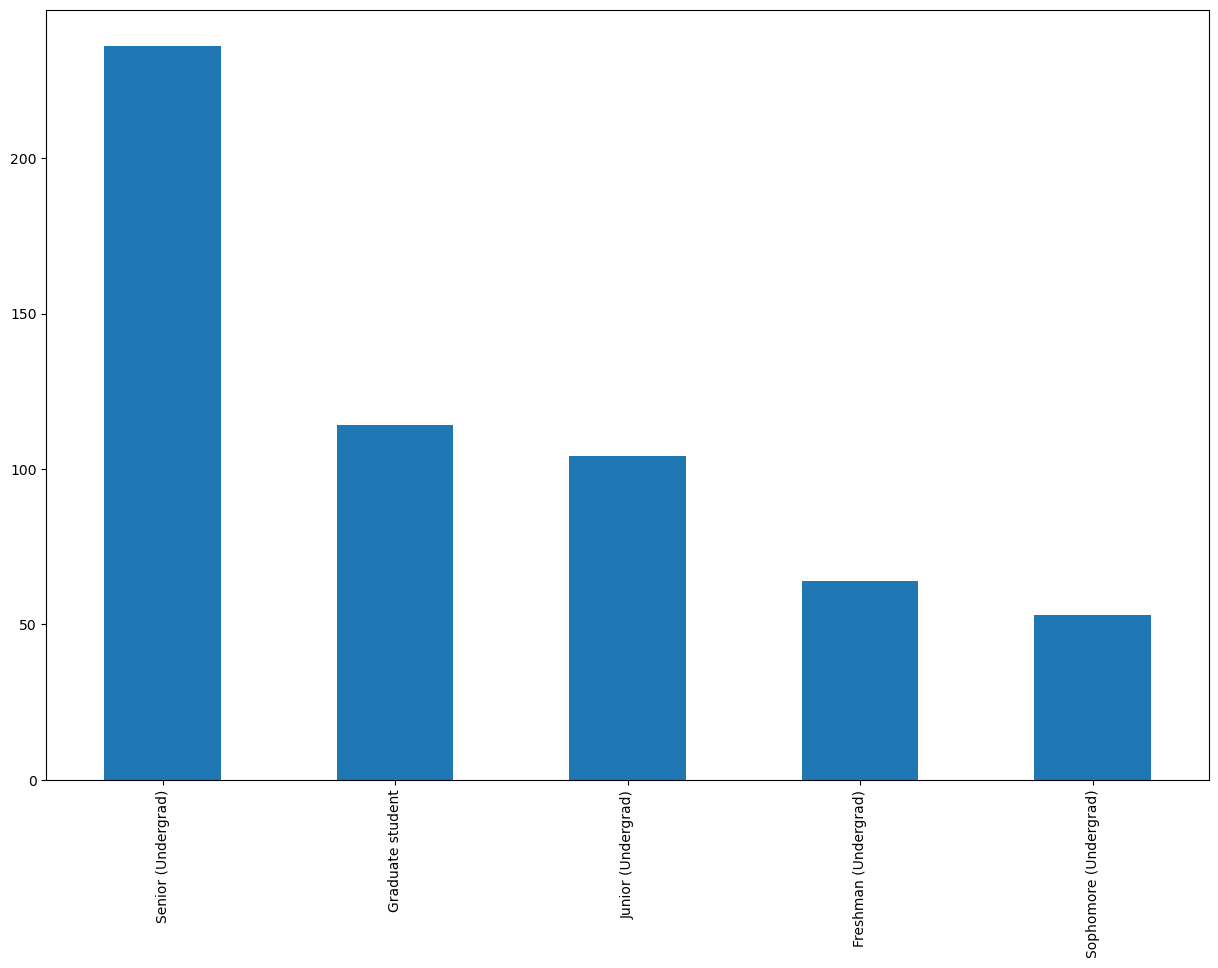

In [18]:
from typing import ValuesView
plt.figure(figsize=(15, 10))
dataset2['class'].value_counts()[:30].plot(kind= 'bar')

In [19]:
dataset2.drop('class', inplace=True, axis=1)
dataset2.head()

gender    age livingWfamily acasatisfaction       CGPA drugs relationship  \
0  Female   > 25           Yes             Yes  3.01-3.50    No          Yes   
1    Male  21-25           Yes             Yes  3.01-3.50    No          Yes   
2    Male   > 25           Yes             Yes     > 3.50    No           No   
3  Female  21-25           Yes             Yes     > 3.50    No           No   
4    Male  21-25           Yes             Yes     > 3.50    No           No   

  breakup      conflict financialProb  ... TIPI1 TIPI2 TIPI3 TIPI4  TIPI5  \
0     Yes     Sometimes           Yes  ...     1     5     4     7      7   
1      No     Sometimes           Yes  ...     6     5     2     7      5   
2      No  Never occurs            No  ...     2     5     7     2      5   
3      No  Never occurs           Yes  ...     1     1     3     4      6   
4      No     Sometimes            No  ...     2     5     6     6      5   

   TIPI6  TIPI7  TIPI8  TIPI9  TIPI10  
0      7      7      5      1       1  
1      4      7      5      1       5  
2      6      5      5      3       2  
3      4      6      5      6       1  
4      5      5      5      3       3  

[5 rows x 31 columns]

### Gender

<AxesSubplot:>

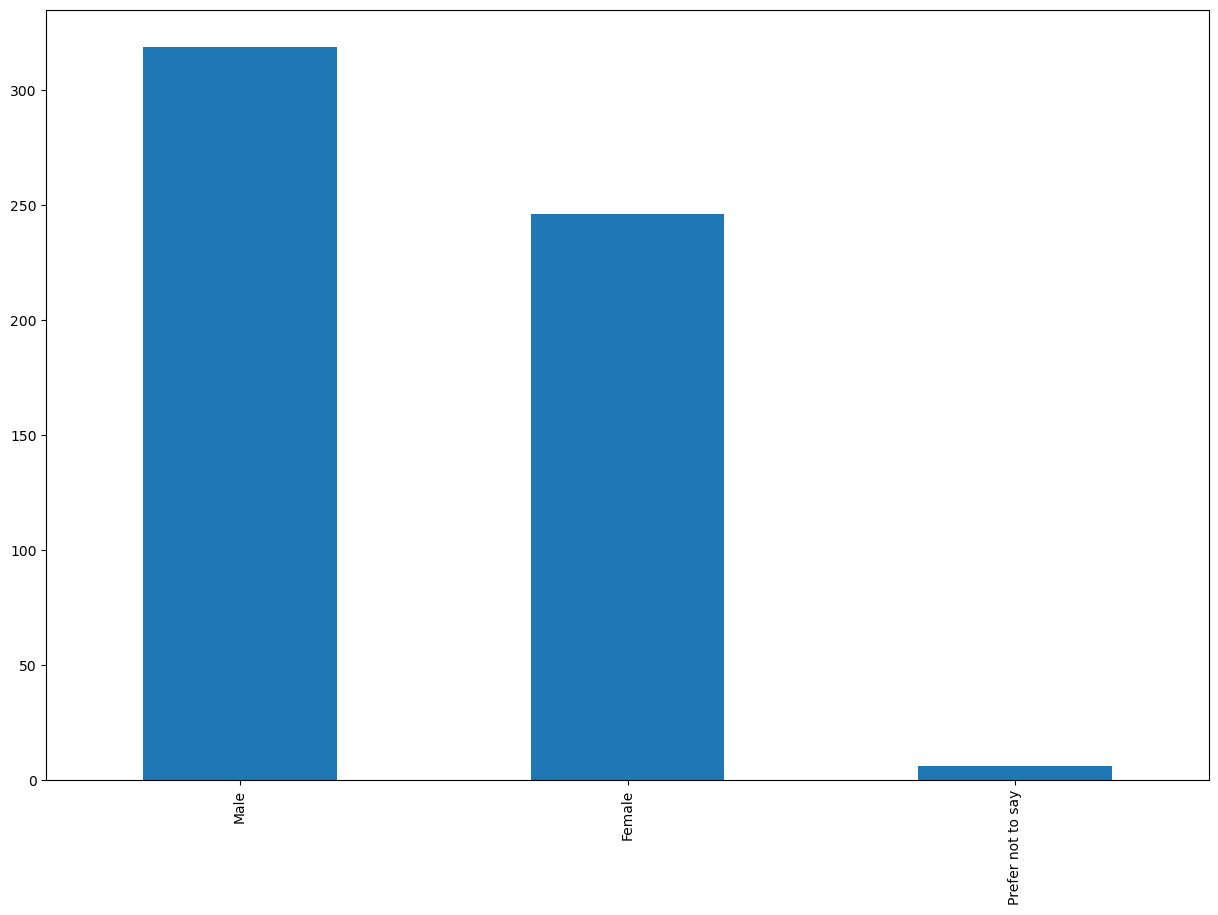

In [20]:
from typing import ValuesView
plt.figure(figsize=(15, 10))
dataset2['gender'].value_counts()[:30].plot(kind= 'bar')

In [21]:
print('Count of People participated as of Gender\n',dataset2['gender'].value_counts())

Count of People participated as of Gender
 Male                 319
Female               246
Prefer not to say      6
Name: gender, dtype: int64


### Encoding techniques

In [22]:
le = LabelEncoder()
for col in dataset2.columns:
    if dataset2[col].dtype == np.number:
        continue 
    else:
        dataset2[col] = le.fit_transform(dataset2[col])

In [23]:
dataset2.head()

gender  age  livingWfamily  acasatisfaction  CGPA  drugs  relationship  \
0       0    2              1                1     0      0             1   
1       1    0              1                1     0      0             1   
2       1    2              1                1     2      0             0   
3       0    0              1                1     2      0             0   
4       1    0              1                1     2      0             0   

   breakup  conflict  financialProb  ...  TIPI1  TIPI2  TIPI3  TIPI4  TIPI5  \
0        1         2              1  ...      1      5      4      7      7   
1        0         2              1  ...      6      5      2      7      5   
2        0         1              0  ...      2      5      7      2      5   
3        0         1              1  ...      1      1      3      4      6   
4        0         2              0  ...      2      5      6      6      5   

   TIPI6  TIPI7  TIPI8  TIPI9  TIPI10  
0      7      7      5      1       1  
1      4      7      5      1       5  
2      6      5      5      3       2  
3      4      6      5      6       1  
4      5      5      5      3       3  

[5 rows x 31 columns]

In [24]:
dataset2.columns

Index(['gender', 'age', 'livingWfamily', 'acasatisfaction', 'CGPA', 'drugs',
       'relationship', 'breakup', 'conflict', 'financialProb', 'Violence',
       'bullied', 'abused', 'smediaT', 'Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A',
       'Q6A', 'Q7A', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6',
       'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10'],
      dtype='object')

In [25]:
new_data=dataset2.iloc[::]
data_3=dataset2.filter(regex='Q\d{1,2}A')
data_3.head()

Q1A  Q2A  Q3A  Q4A  Q5A  Q6A  Q7A
0    0    1    2    3    1    2    3
1    1    3    2    1    3    3    2
2    0    0    0    0    0    0    0
3    1    1    0    1    2    1    1
4    2    2    2    3    0    0    0

In [26]:
dataset2['S_Count'] = (dataset2['Q1A'] + dataset2['Q2A'] + dataset2['Q3A'] + dataset2['Q4A'] + dataset2['Q5A'] + dataset2['Q6A'] + dataset2['Q7A'])*2
dataset2.head()

gender  age  livingWfamily  acasatisfaction  CGPA  drugs  relationship  \
0       0    2              1                1     0      0             1   
1       1    0              1                1     0      0             1   
2       1    2              1                1     2      0             0   
3       0    0              1                1     2      0             0   
4       1    0              1                1     2      0             0   

   breakup  conflict  financialProb  ...  TIPI2  TIPI3  TIPI4  TIPI5  TIPI6  \
0        1         2              1  ...      5      4      7      7      7   
1        0         2              1  ...      5      2      7      5      4   
2        0         1              0  ...      5      7      2      5      6   
3        0         1              1  ...      1      3      4      6      4   
4        0         2              0  ...      5      6      6      5      5   

   TIPI7  TIPI8  TIPI9  TIPI10  S_Count  
0      7      5      1       1       24  
1      7      5      1       5       30  
2      5      5      3       2        0  
3      6      5      6       1       14  
4      5      5      3       3       18  

[5 rows x 32 columns]

### Filter data

In [27]:
stress= dataset2.drop(['Q1A', 'Q2A','Q3A', 'Q4A','Q5A', 'Q6A','Q7A'], axis=1)
stress.head()

gender  age  livingWfamily  acasatisfaction  CGPA  drugs  relationship  \
0       0    2              1                1     0      0             1   
1       1    0              1                1     0      0             1   
2       1    2              1                1     2      0             0   
3       0    0              1                1     2      0             0   
4       1    0              1                1     2      0             0   

   breakup  conflict  financialProb  ...  TIPI2  TIPI3  TIPI4  TIPI5  TIPI6  \
0        1         2              1  ...      5      4      7      7      7   
1        0         2              1  ...      5      2      7      5      4   
2        0         1              0  ...      5      7      2      5      6   
3        0         1              1  ...      1      3      4      6      4   
4        0         2              0  ...      5      6      6      5      5   

   TIPI7  TIPI8  TIPI9  TIPI10  S_Count  
0      7      5      1       1       24  
1      7      5      1       5       30  
2      5      5      3       2        0  
3      6      5      6       1       14  
4      5      5      3       3       18  

[5 rows x 25 columns]

### Stress Work

In [28]:
#defining function filter 
def filter(x):
    if x <= 18:
        return 'No'
    if x > 18:
        return 'Yes'
stress['Slevel'] = stress['S_Count'].apply(filter)
stress.tail(5)

gender  age  livingWfamily  acasatisfaction  CGPA  drugs  relationship  \
566       0    0              1                1     0      0             1   
567       1    0              1                1     0      0             0   
568       1    0              1                1     0      0             0   
569       1    0              1                0     1      0             1   
570       1    0              1                1     2      0             0   

     breakup  conflict  financialProb  ...  TIPI3  TIPI4  TIPI5  TIPI6  TIPI7  \
566        0         2              0  ...      7      5      5      5      5   
567        0         2              0  ...      4      4      4      4      4   
568        0         2              0  ...      5      5      7      6      6   
569        0         1              0  ...      5      2      4      4      4   
570        0         1              1  ...      6      5      5      5      5   

     TIPI8  TIPI9  TIPI10  S_Count  Slevel  
566      2      7       2       10      No  
567      4      4       4       12      No  
568      5      5       1       26     Yes  
569      4      4       4       18      No  
570      2      6       3       20     Yes  

[5 rows x 26 columns]

In [29]:
stress.drop('S_Count', inplace=True, axis=1)
stress.head()

gender  age  livingWfamily  acasatisfaction  CGPA  drugs  relationship  \
0       0    2              1                1     0      0             1   
1       1    0              1                1     0      0             1   
2       1    2              1                1     2      0             0   
3       0    0              1                1     2      0             0   
4       1    0              1                1     2      0             0   

   breakup  conflict  financialProb  ...  TIPI2  TIPI3  TIPI4  TIPI5  TIPI6  \
0        1         2              1  ...      5      4      7      7      7   
1        0         2              1  ...      5      2      7      5      4   
2        0         1              0  ...      5      7      2      5      6   
3        0         1              1  ...      1      3      4      6      4   
4        0         2              0  ...      5      6      6      5      5   

   TIPI7  TIPI8  TIPI9  TIPI10  Slevel  
0      7      5      1       1     Yes  
1      7      5      1       5     Yes  
2      5      5      3       2      No  
3      6      5      6       1      No  
4      5      5      3       3      No  

[5 rows x 25 columns]

### Encoding Tecnique with target Column

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
stress.Slevel = le.fit_transform(stress.Slevel)

In [31]:
stress['Slevel'].value_counts()

1    335
0    236
Name: Slevel, dtype: int64

In [32]:
stress['gender'].value_counts()

1    319
0    246
2      6
Name: gender, dtype: int64

In [33]:
stress.head()

gender  age  livingWfamily  acasatisfaction  CGPA  drugs  relationship  \
0       0    2              1                1     0      0             1   
1       1    0              1                1     0      0             1   
2       1    2              1                1     2      0             0   
3       0    0              1                1     2      0             0   
4       1    0              1                1     2      0             0   

   breakup  conflict  financialProb  ...  TIPI2  TIPI3  TIPI4  TIPI5  TIPI6  \
0        1         2              1  ...      5      4      7      7      7   
1        0         2              1  ...      5      2      7      5      4   
2        0         1              0  ...      5      7      2      5      6   
3        0         1              1  ...      1      3      4      6      4   
4        0         2              0  ...      5      6      6      5      5   

   TIPI7  TIPI8  TIPI9  TIPI10  Slevel  
0      7      5      1       1       1  
1      7      5      1       5       1  
2      5      5      3       2       0  
3      6      5      6       1       0  
4      5      5      3       3       0  

[5 rows x 25 columns]

Text(0.5, 1.0, 'Stress Condition')

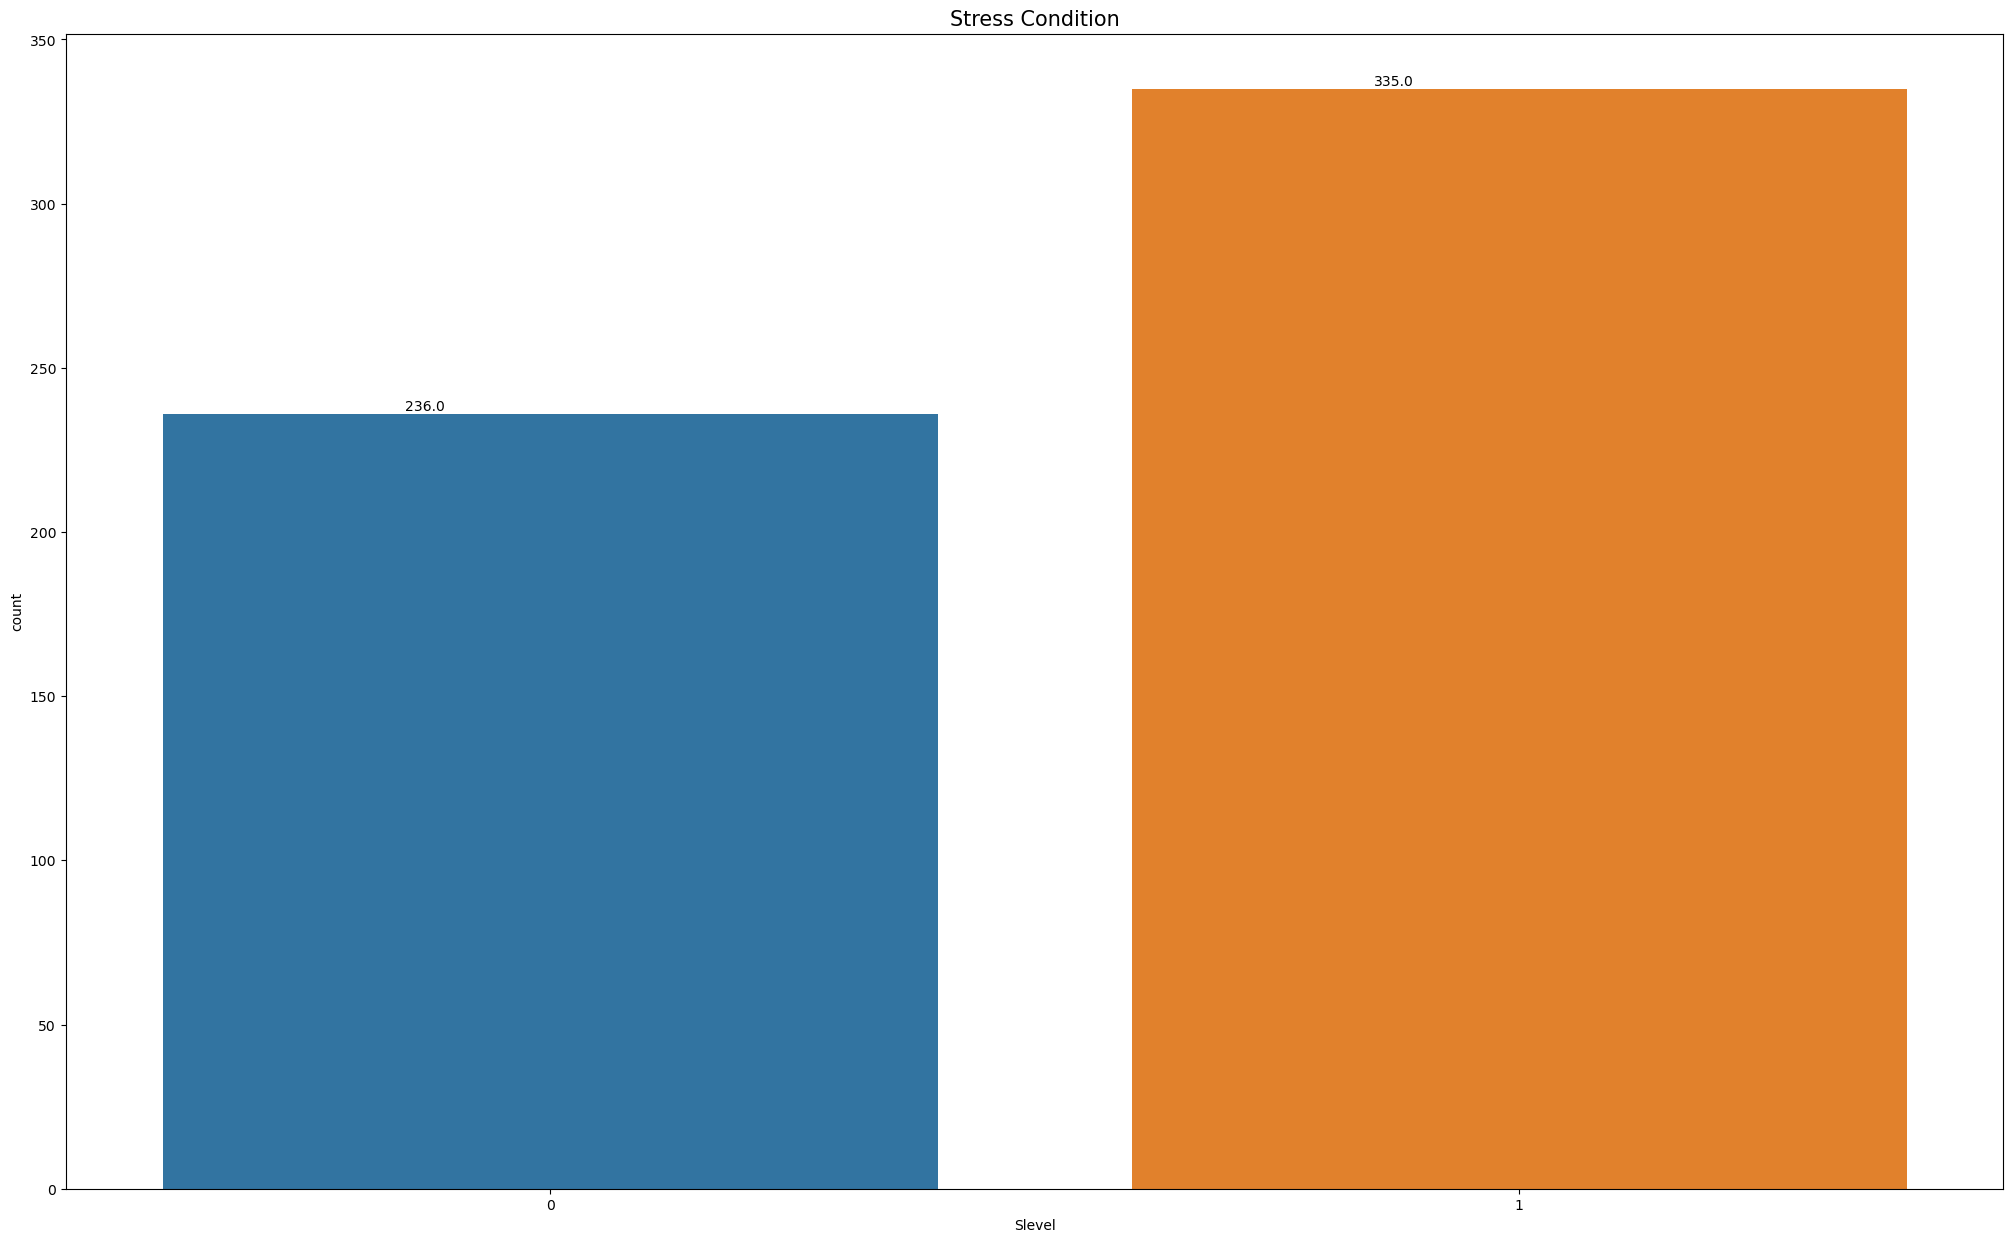

In [34]:
plt.figure(figsize=(25,15))
ax=sns.countplot(x=stress.Slevel, data=stress)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Stress Condition',fontsize=15)

Text(0.5, 1.0, 'Stress Condition')

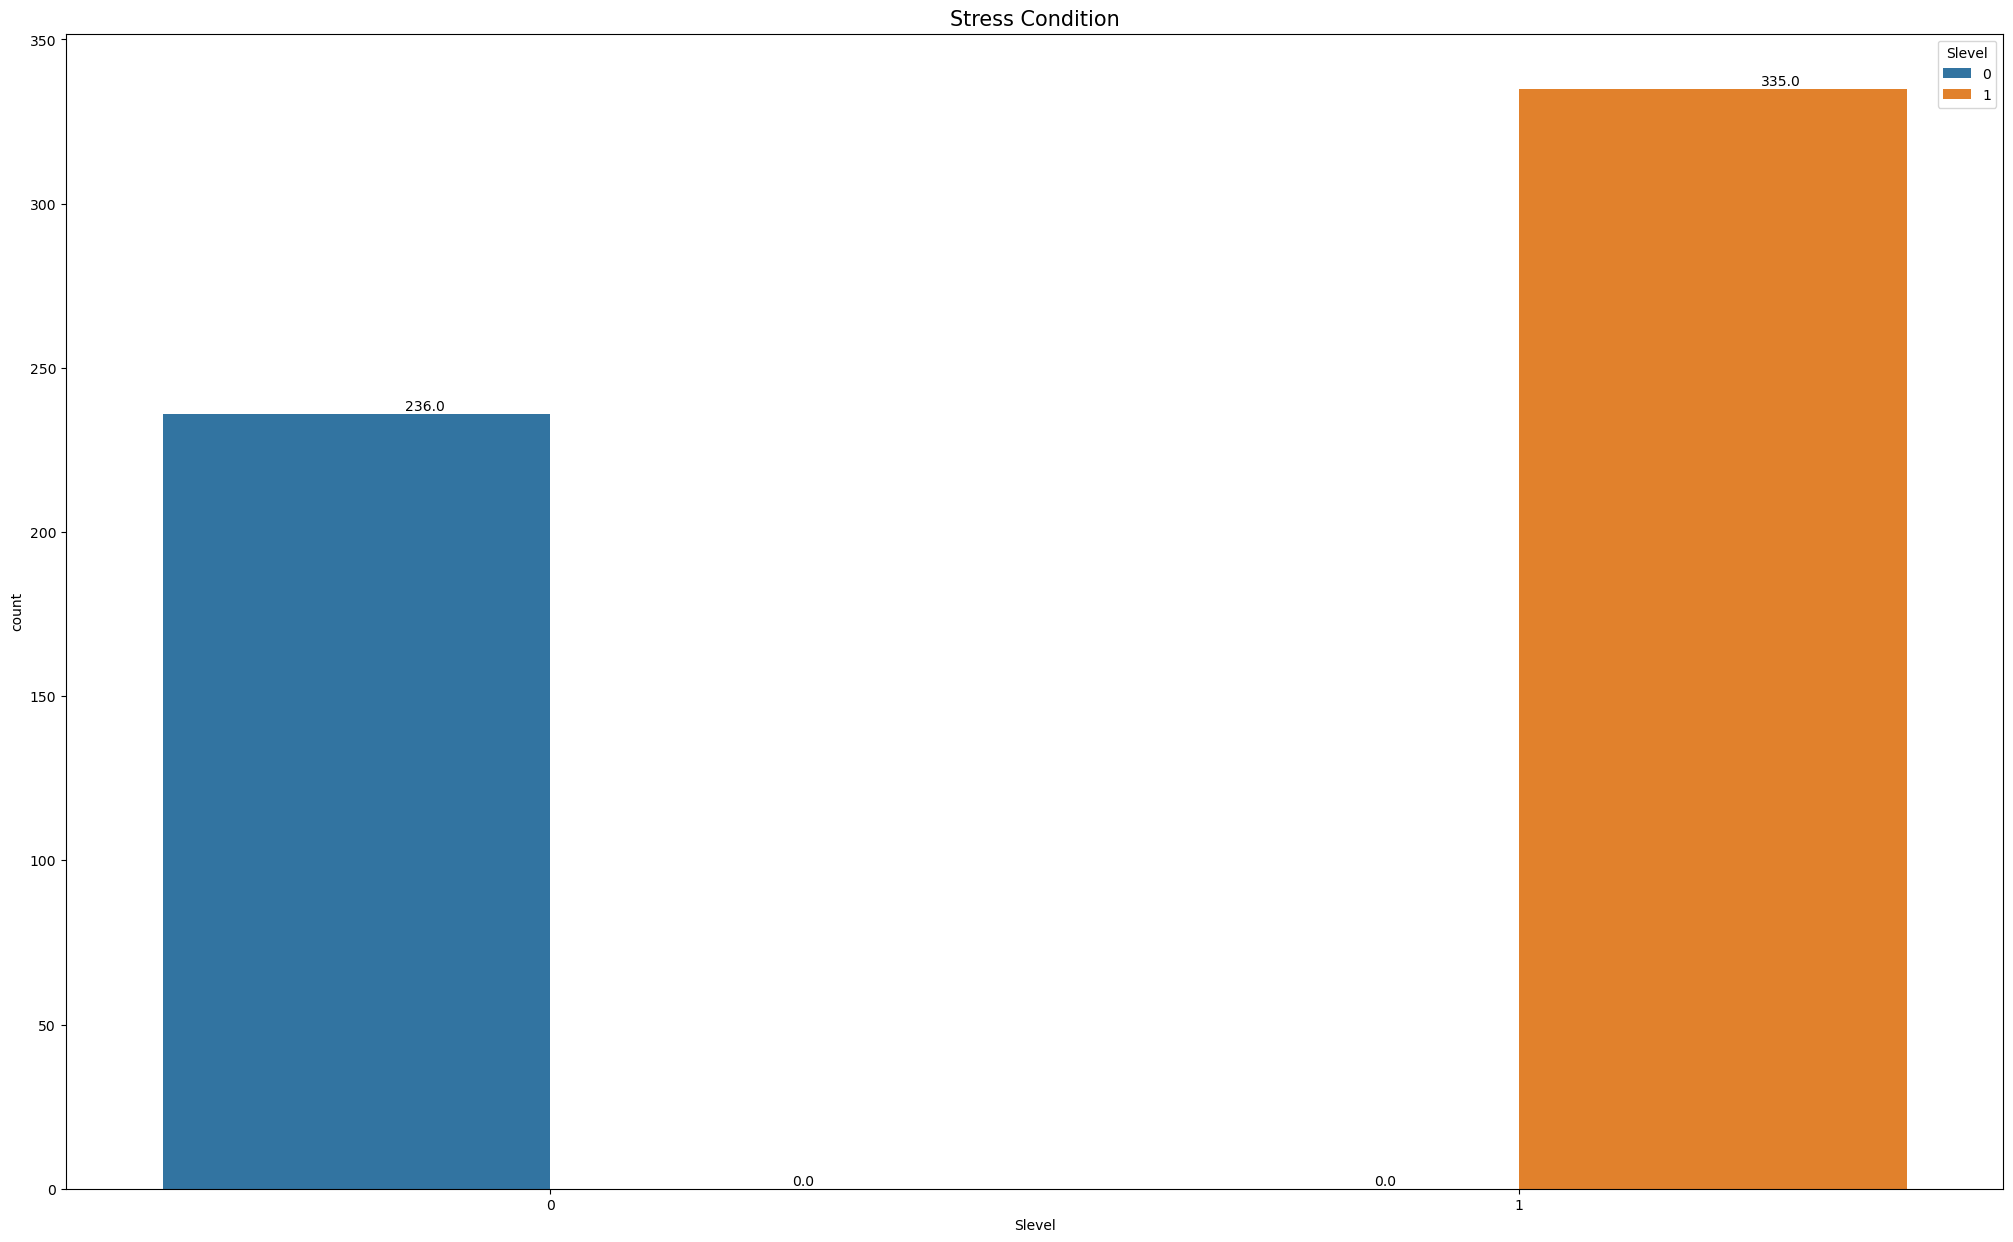

In [35]:
plt.figure(figsize=(25,15))
ax=sns.countplot(x=stress.Slevel, data=stress, hue='Slevel')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Stress Condition',fontsize=15)


##### Comparing different answers given for situations like gender, relationship,financial issues etc and comparing with their Conditions

Genders

Text(0.5, 1.0, 'stress Condition of Different Gender')

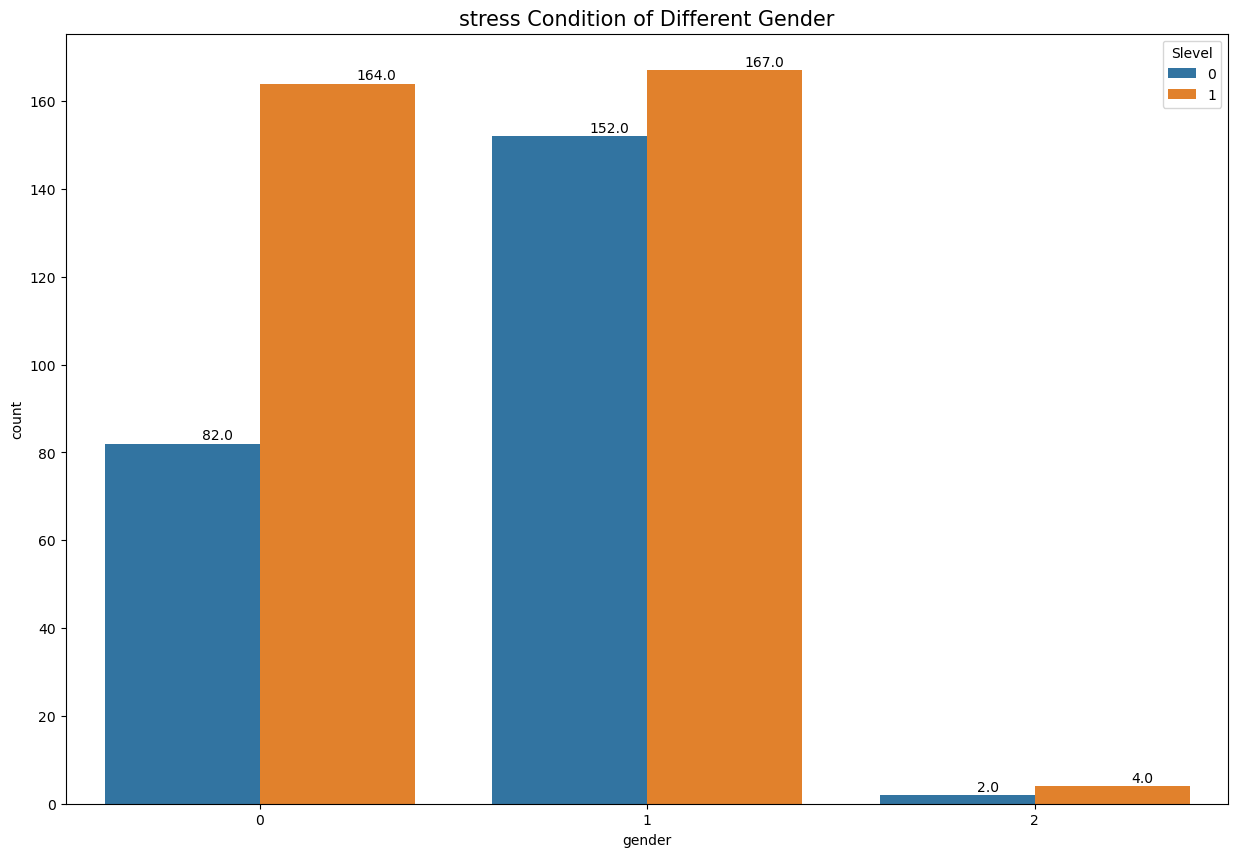

In [36]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x=stress.gender, data=stress, hue='Slevel')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('stress Condition of Different Gender',fontsize=15)

### Data Comparison for Are you happy about your academic condition?

In [37]:
stress['acasatisfaction'].value_counts()

0    324
1    247
Name: acasatisfaction, dtype: int64

Text(0.5, 1.0, 'Are you happy about your academic condition?For stress')

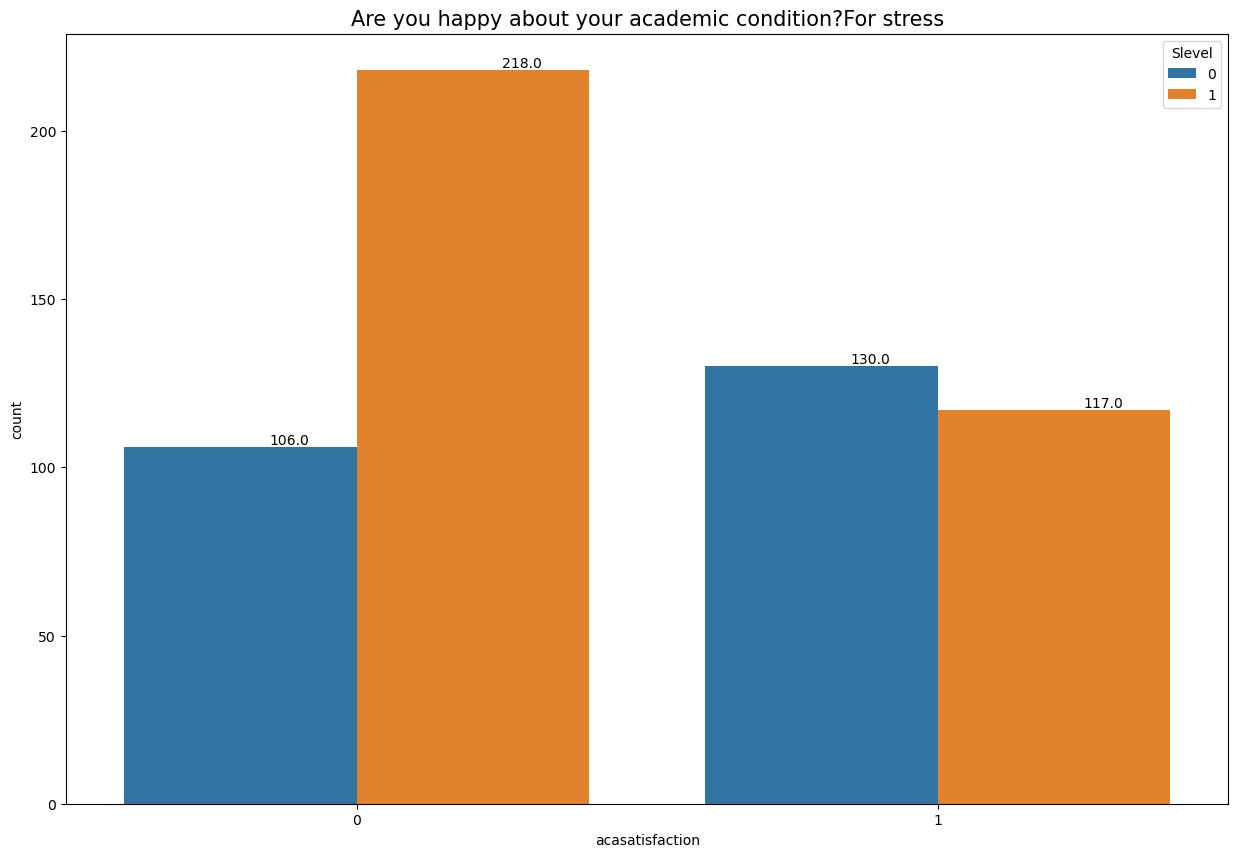

In [38]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x=stress.acasatisfaction, data=stress, hue='Slevel')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Are you happy about your academic condition?For stress',fontsize=15)

### Data Comparison for Have you ever been bullied?

In [39]:
stress['bullied'].value_counts()

1    345
0    226
Name: bullied, dtype: int64

Text(0.5, 1.0, 'Have you ever been bullied?:Stress')

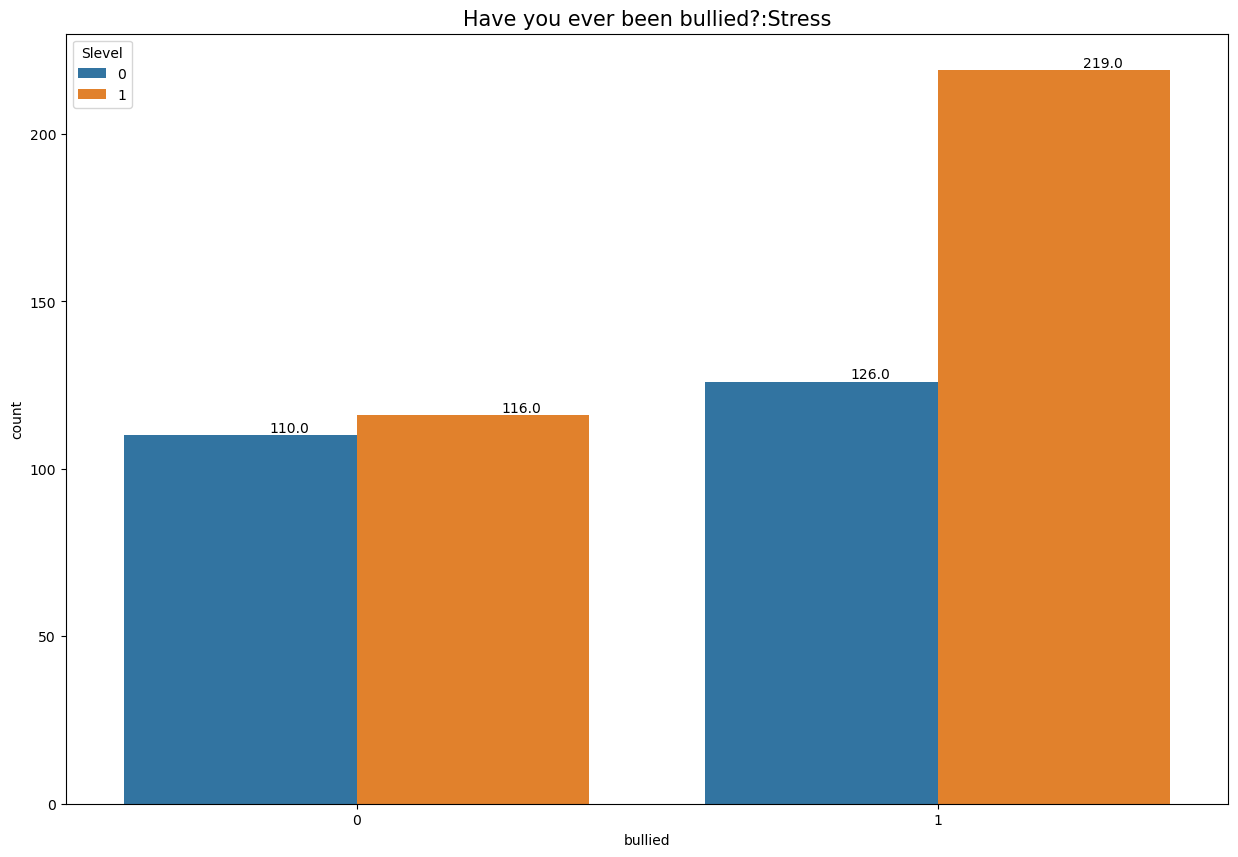

In [40]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x=stress.bullied, data=stress, hue='Slevel')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Have you ever been bullied?:Stress',fontsize=15)

### Data Comparison for How often do you conflict with your friend?

In [41]:
stress['conflict'].value_counts()

2    364
1    169
0     38
Name: conflict, dtype: int64

Text(0.5, 1.0, 'conflict with your friend : Stress')

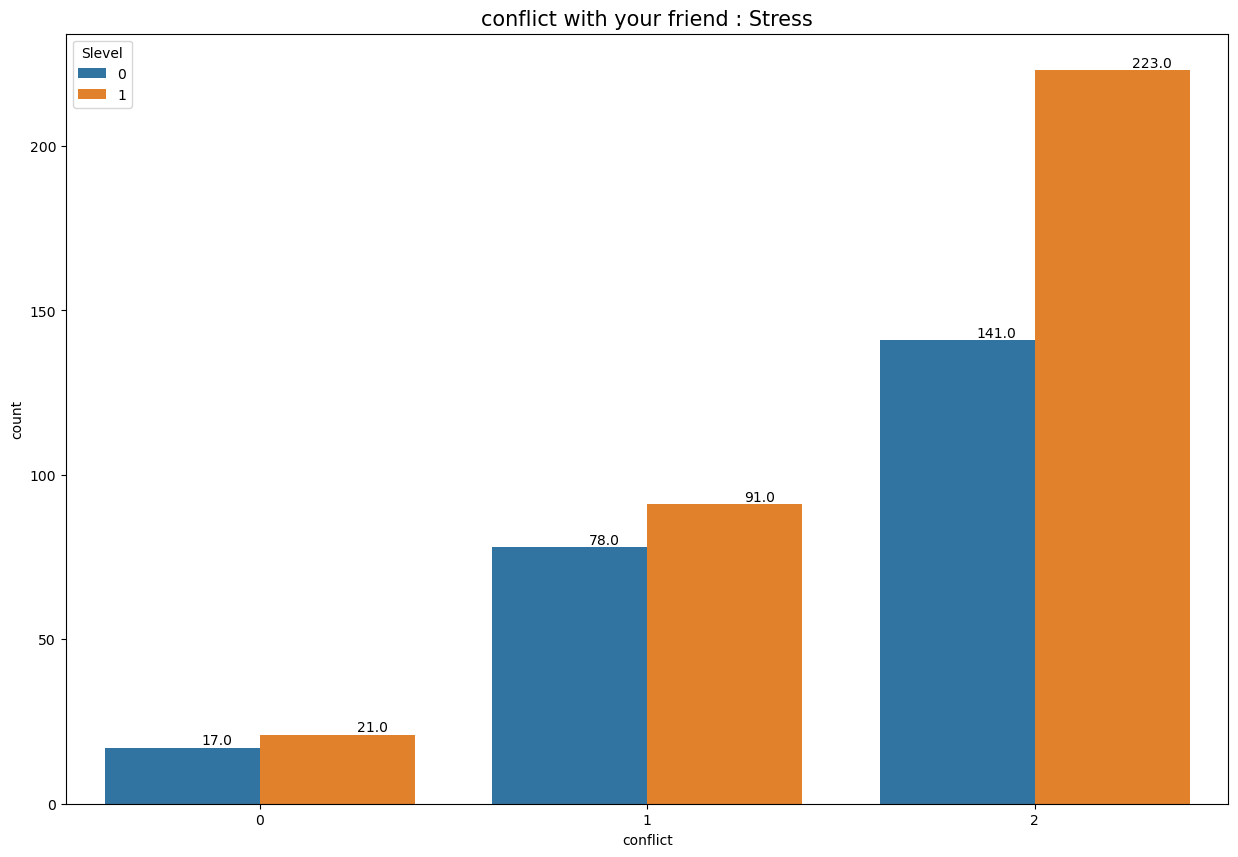

In [42]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x=stress.conflict, data=stress, hue='Slevel')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('conflict with your friend : Stress',fontsize=15)

### Data Comparison for Did you have a recent breakup?

In [43]:
stress['breakup'].value_counts()

0    448
1    123
Name: breakup, dtype: int64

Text(0.5, 1.0, 'Did you have a recent breakup? : Stress')

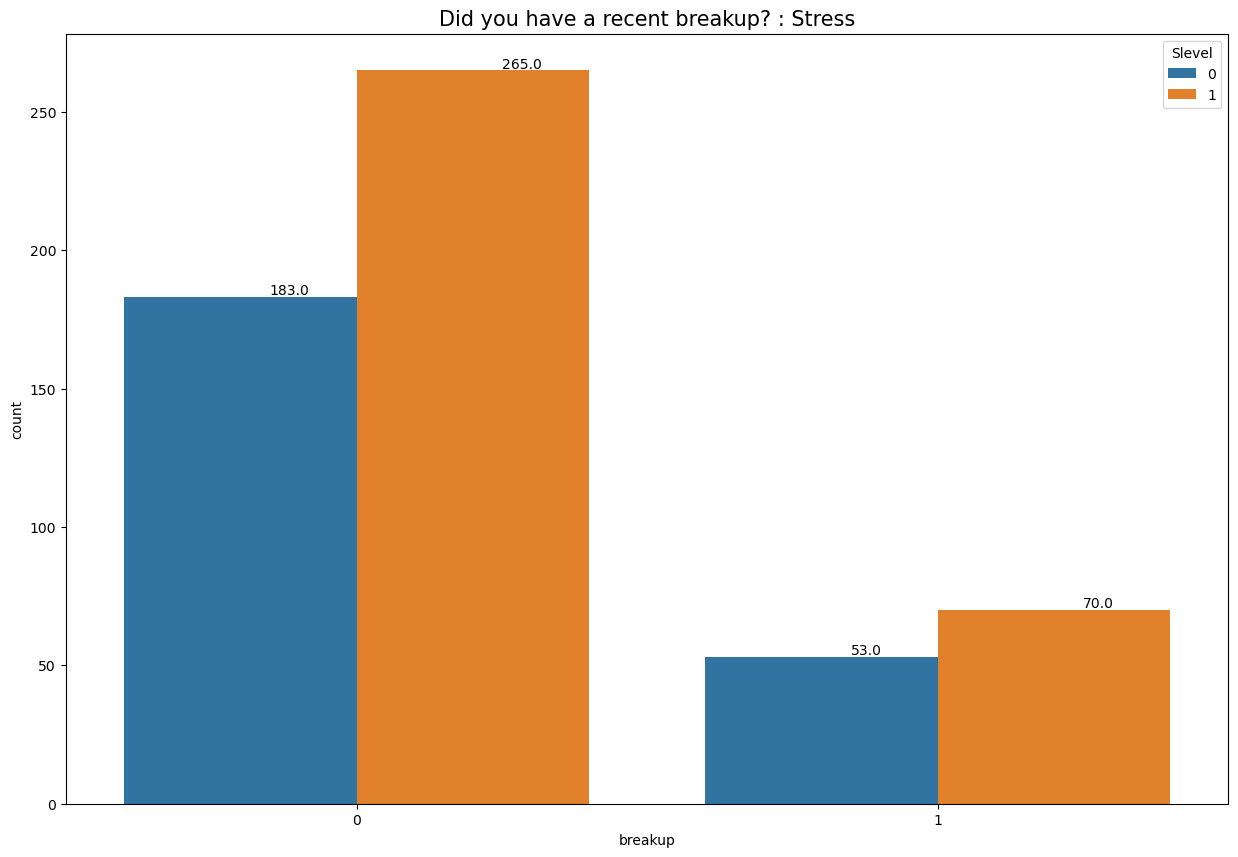

In [44]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x=stress.breakup, data=stress, hue='Slevel')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Did you have a recent breakup? : Stress',fontsize=15)

### Data Comparison for How many hours do you spend on social media?

In [45]:
stress['smediaT'].value_counts()

2    313
0    212
1     46
Name: smediaT, dtype: int64

Text(0.5, 1.0, 'How many hours do you spend on social media? : Stress')

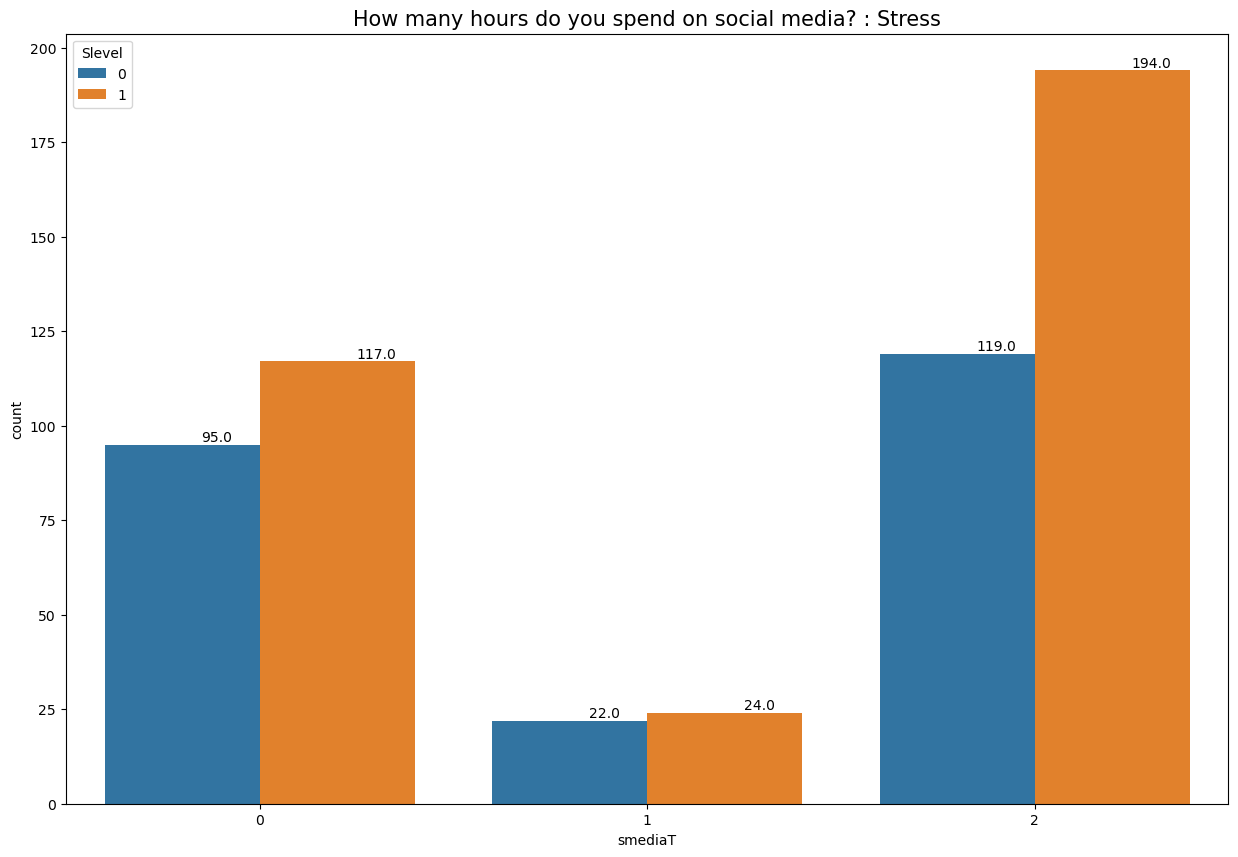

In [46]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x=stress.smediaT, data=stress, hue='Slevel')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('How many hours do you spend on social media? : Stress',fontsize=15)

### Data Comparison for Violence in family?

In [47]:
stress['Violence'].value_counts()

1    247
3    213
2     66
0     45
Name: Violence, dtype: int64

Text(0.5, 1.0, 'Violence in family?:Stress')

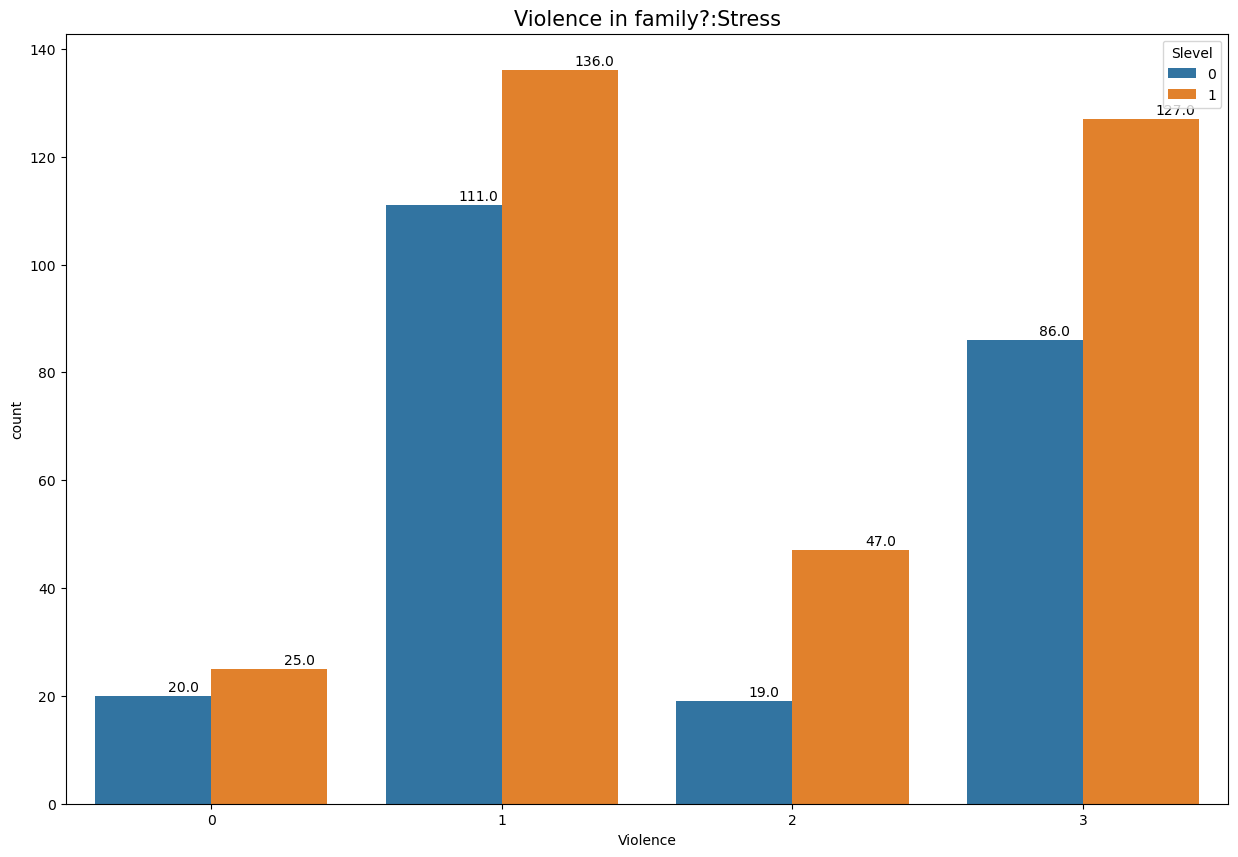

In [48]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x=stress.Violence, data=stress, hue='Slevel')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Violence in family?:Stress',fontsize=15)

### Data Comparison for Are you addicted to any drugs?

In [49]:
stress['drugs'].value_counts()

0    519
1     52
Name: drugs, dtype: int64

Text(0.5, 1.0, 'Are you addicted to any drugs?: Stress')

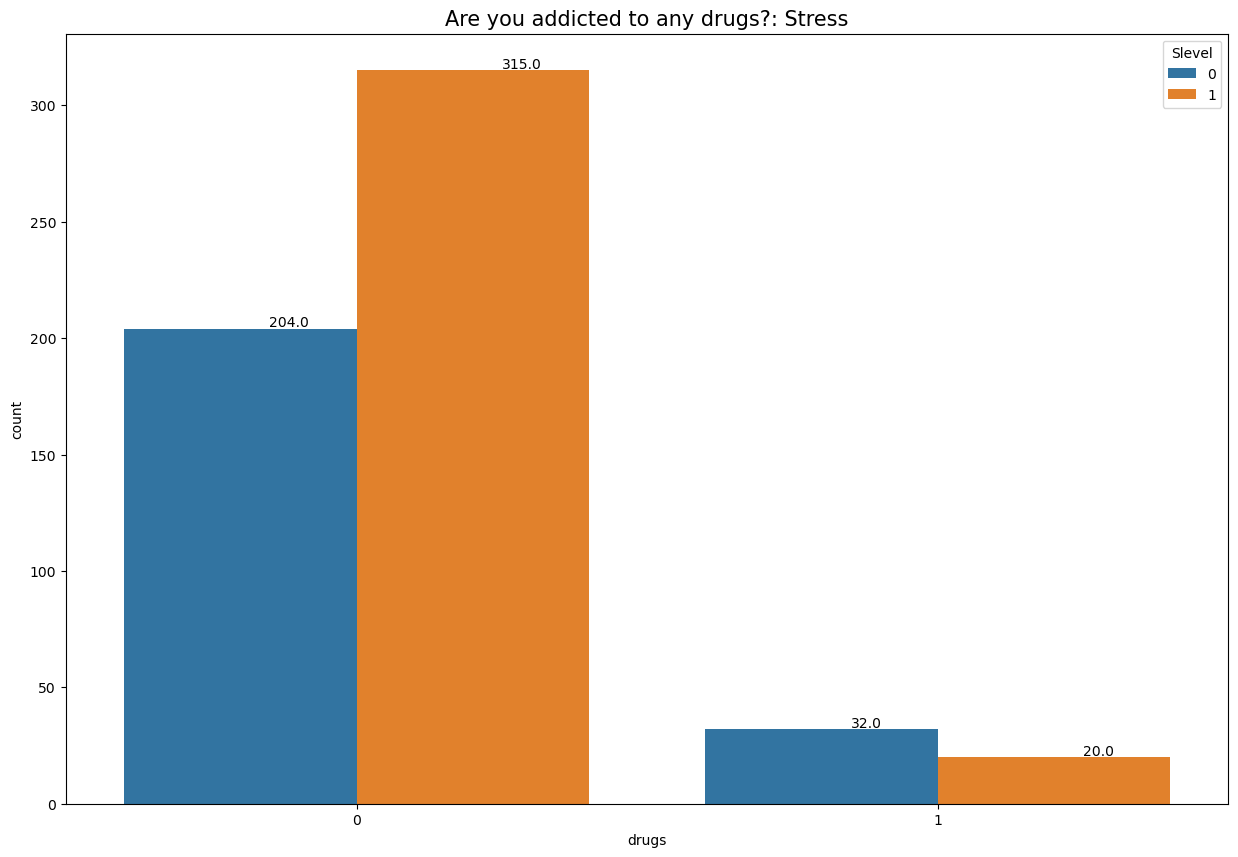

In [50]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x=stress.drugs, data=stress, hue='Slevel')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Are you addicted to any drugs?: Stress',fontsize=15)

### Data Comparison for Have you ever been sexually harassed or abused?

In [51]:
stress['abused'].value_counts()

1    360
2    162
0     49
Name: abused, dtype: int64

Text(0.5, 1.0, 'Have you ever been sexually harassed or abused? : Stress')

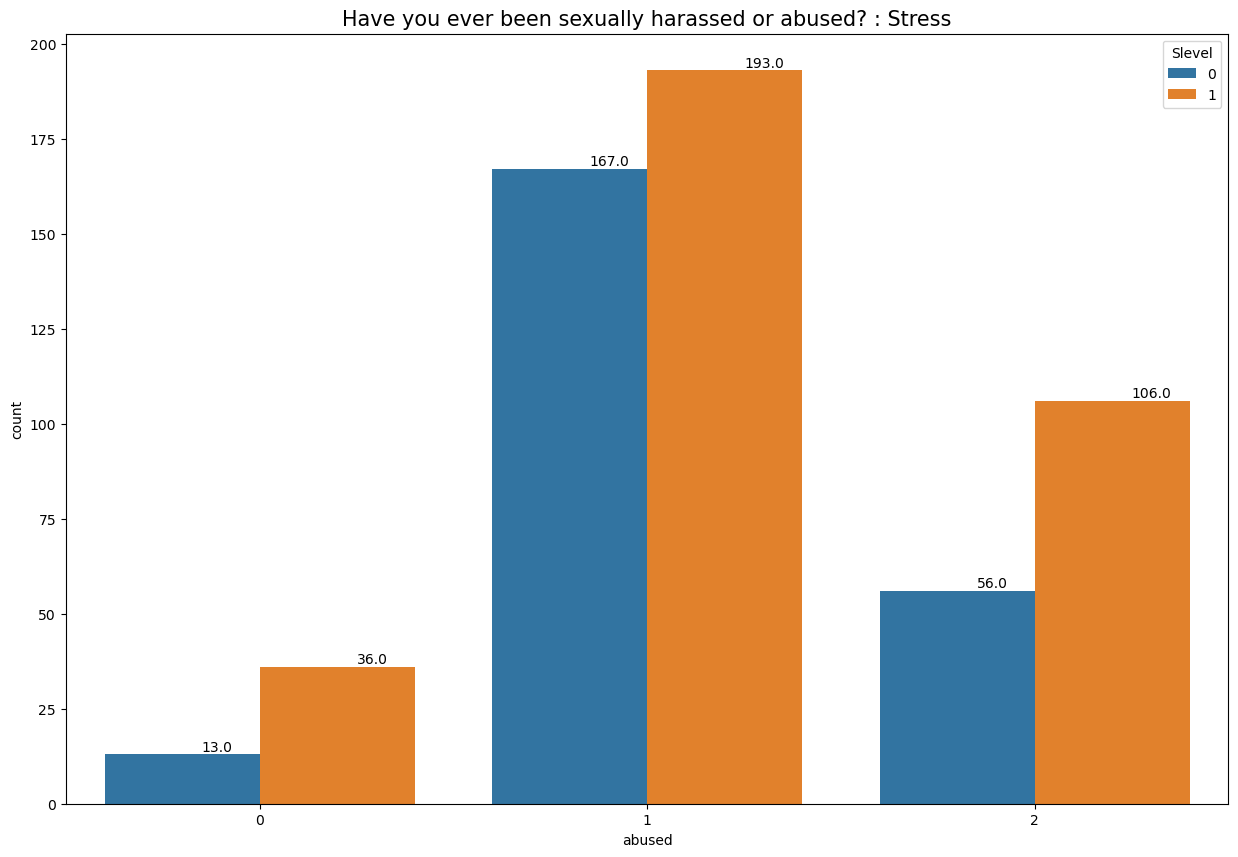

In [52]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x=stress.abused, data=stress, hue='Slevel')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Have you ever been sexually harassed or abused? : Stress',fontsize=15)

### Data Comparison for Are you in a relationship?

In [53]:
stress['relationship'].value_counts()

0    396
1    175
Name: relationship, dtype: int64

Text(0.5, 1.0, 'Are you in a relationship?:Stress')

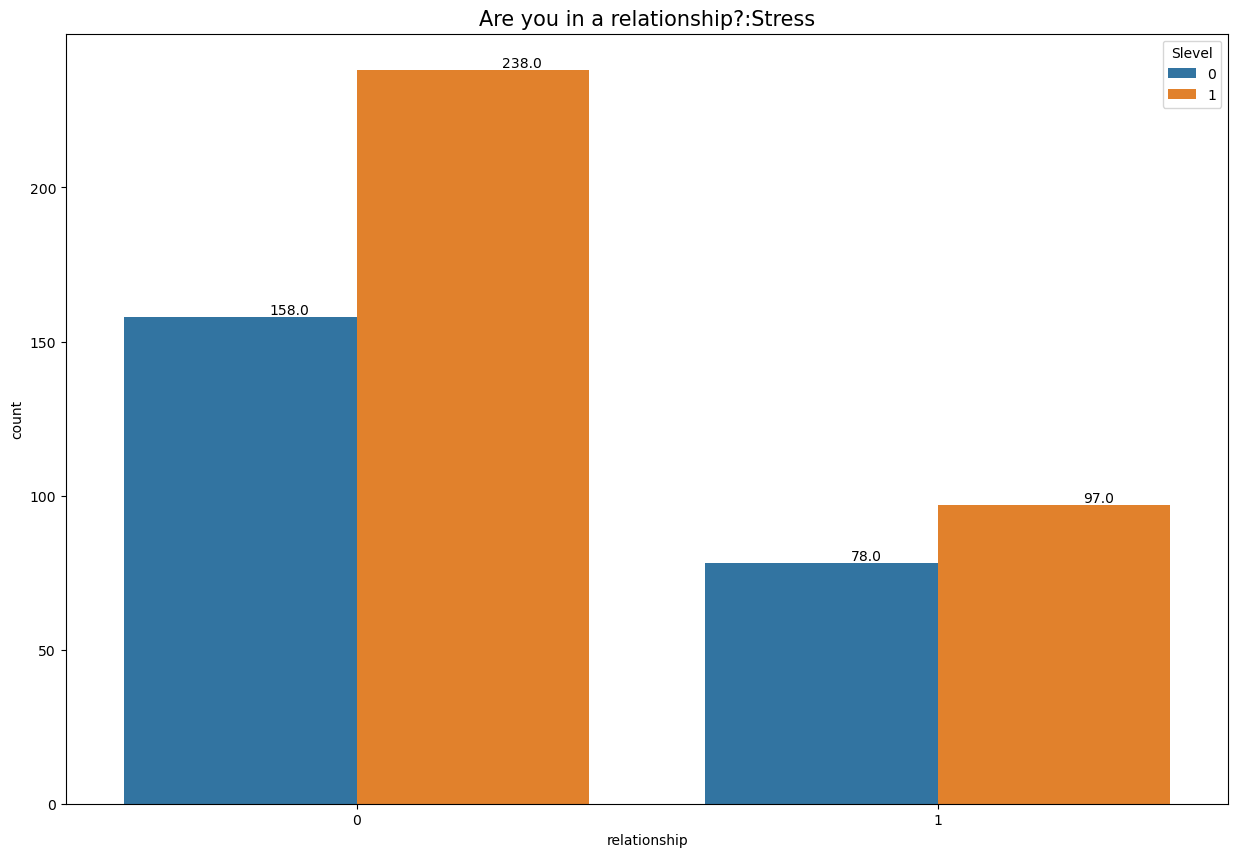

In [54]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x=stress.relationship, data=stress, hue='Slevel')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Are you in a relationship?:Stress',fontsize=15)

### Data Comparison for Do you have financial problem in your family?

In [55]:
stress['financialProb'].value_counts()

0    291
1    280
Name: financialProb, dtype: int64

Text(0.5, 1.0, 'Do you have financial problem in your family?: Stress')

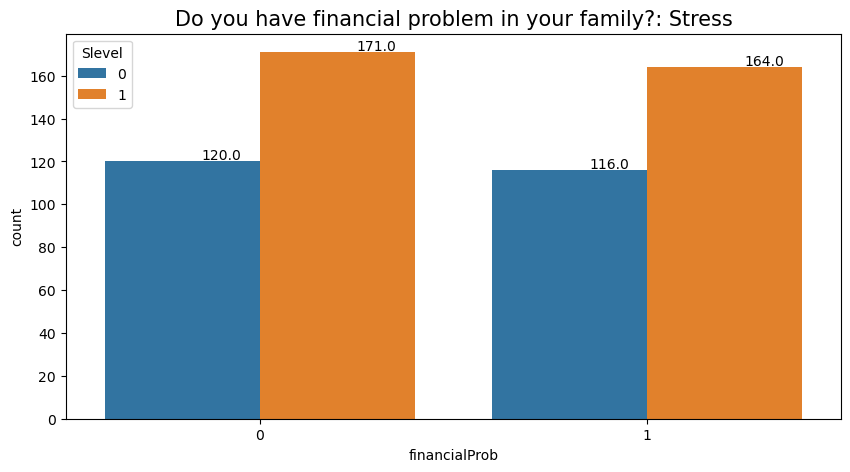

In [56]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x=stress.financialProb, data=stress, hue='Slevel')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.9))
plt.title('Do you have financial problem in your family?: Stress',fontsize=15)

In [57]:
stress.corr()

gender       age  livingWfamily  acasatisfaction      CGPA  \
gender           1.000000  0.049892      -0.020929        -0.063092  0.074910   
age              0.049892  1.000000       0.012299        -0.063414  0.100527   
livingWfamily   -0.020929  0.012299       1.000000         0.068630 -0.012908   
acasatisfaction -0.063092 -0.063414       0.068630         1.000000  0.173150   
CGPA             0.074910  0.100527      -0.012908         0.173150  1.000000   
drugs            0.057462 -0.078346      -0.054527         0.018505 -0.008932   
relationship    -0.099275 -0.005498      -0.006865         0.040633 -0.019871   
breakup         -0.043897  0.017993       0.059257         0.092807 -0.011041   
conflict        -0.044165  0.015615      -0.051837        -0.034605  0.042219   
financialProb   -0.063410  0.014082       0.059334         0.020359  0.033897   
Violence        -0.026674 -0.045284       0.055437        -0.008054 -0.057462   
bullied         -0.104358 -0.038065      -0.072243        -0.131836 -0.004439   
abused          -0.198436  0.027161       0.003270        -0.017718 -0.033815   
smediaT          0.008857  0.021673       0.030315        -0.070104 -0.067900   
TIPI1            0.027830  0.108570      -0.017576         0.009378  0.046855   
TIPI2           -0.074538 -0.022597       0.062814        -0.001353 -0.032670   
TIPI3           -0.031041  0.036059       0.058717         0.007227  0.057939   
TIPI4           -0.137464 -0.056204       0.002921        -0.092724 -0.017226   
TIPI5            0.068482  0.093071       0.037091        -0.015394  0.010425   
TIPI6           -0.016448  0.040208       0.020075        -0.074916 -0.018307   
TIPI7            0.008465  0.024457      -0.022835        -0.045741  0.055100   
TIPI8           -0.069530  0.006027      -0.016182        -0.065799 -0.081832   
TIPI9            0.065807  0.041007      -0.025443         0.094348  0.073773   
TIPI10          -0.122706  0.012451      -0.006853        -0.048078 -0.092744   
Slevel          -0.132693  0.009605       0.002807        -0.200371 -0.055498   

                    drugs  relationship   breakup  conflict  financialProb  \
gender           0.057462     -0.099275 -0.043897 -0.044165      -0.063410   
age             -0.078346     -0.005498  0.017993  0.015615       0.014082   
livingWfamily   -0.054527     -0.006865  0.059257 -0.051837       0.059334   
acasatisfaction  0.018505      0.040633  0.092807 -0.034605       0.020359   
CGPA            -0.008932     -0.019871 -0.011041  0.042219       0.033897   
drugs            1.000000      0.238493  0.174699 -0.155312       0.079158   
relationship     0.238493      1.000000  0.067480 -0.042705       0.077398   
breakup          0.174699      0.067480  1.000000 -0.029266       0.193310   
conflict        -0.155312     -0.042705 -0.029266  1.000000      -0.004899   
financialProb    0.079158      0.077398  0.193310 -0.004899       1.000000   
Violence         0.031091      0.003679  0.060480  0.065408       0.043295   
bullied          0.044580      0.064198  0.110485  0.035120       0.113355   
abused           0.039283      0.094957  0.071585 -0.007507       0.113298   
smediaT          0.005181     -0.003847  0.014661 -0.035251      -0.031698   
TIPI1           -0.003140     -0.036914 -0.076466  0.040411      -0.030292   
TIPI2            0.089120      0.083353  0.142608  0.013658       0.083799   
TIPI3           -0.068776     -0.043786 -0.103281  0.022737      -0.038390   
TIPI4           -0.018732      0.046034  0.074434  0.040148      -0.003554   
TIPI5           -0.067617     -0.015012 -0.038065  0.009953      -0.061237   
TIPI6           -0.085850      0.016015  0.010363  0.003834      -0.032720   
TIPI7           -0.008841     -0.012065 -0.034962 -0.008823      -0.035973   
TIPI8            0.042886      0.038391  0.020065 -0.028402       0.063581   
TIPI9            0.024859     -0.074515 -0.063054 -0.067937      -0.059381   
TIPI10          -0.058407     -0.006620 

Text(0.5, 1.0, 'Correlation Map')

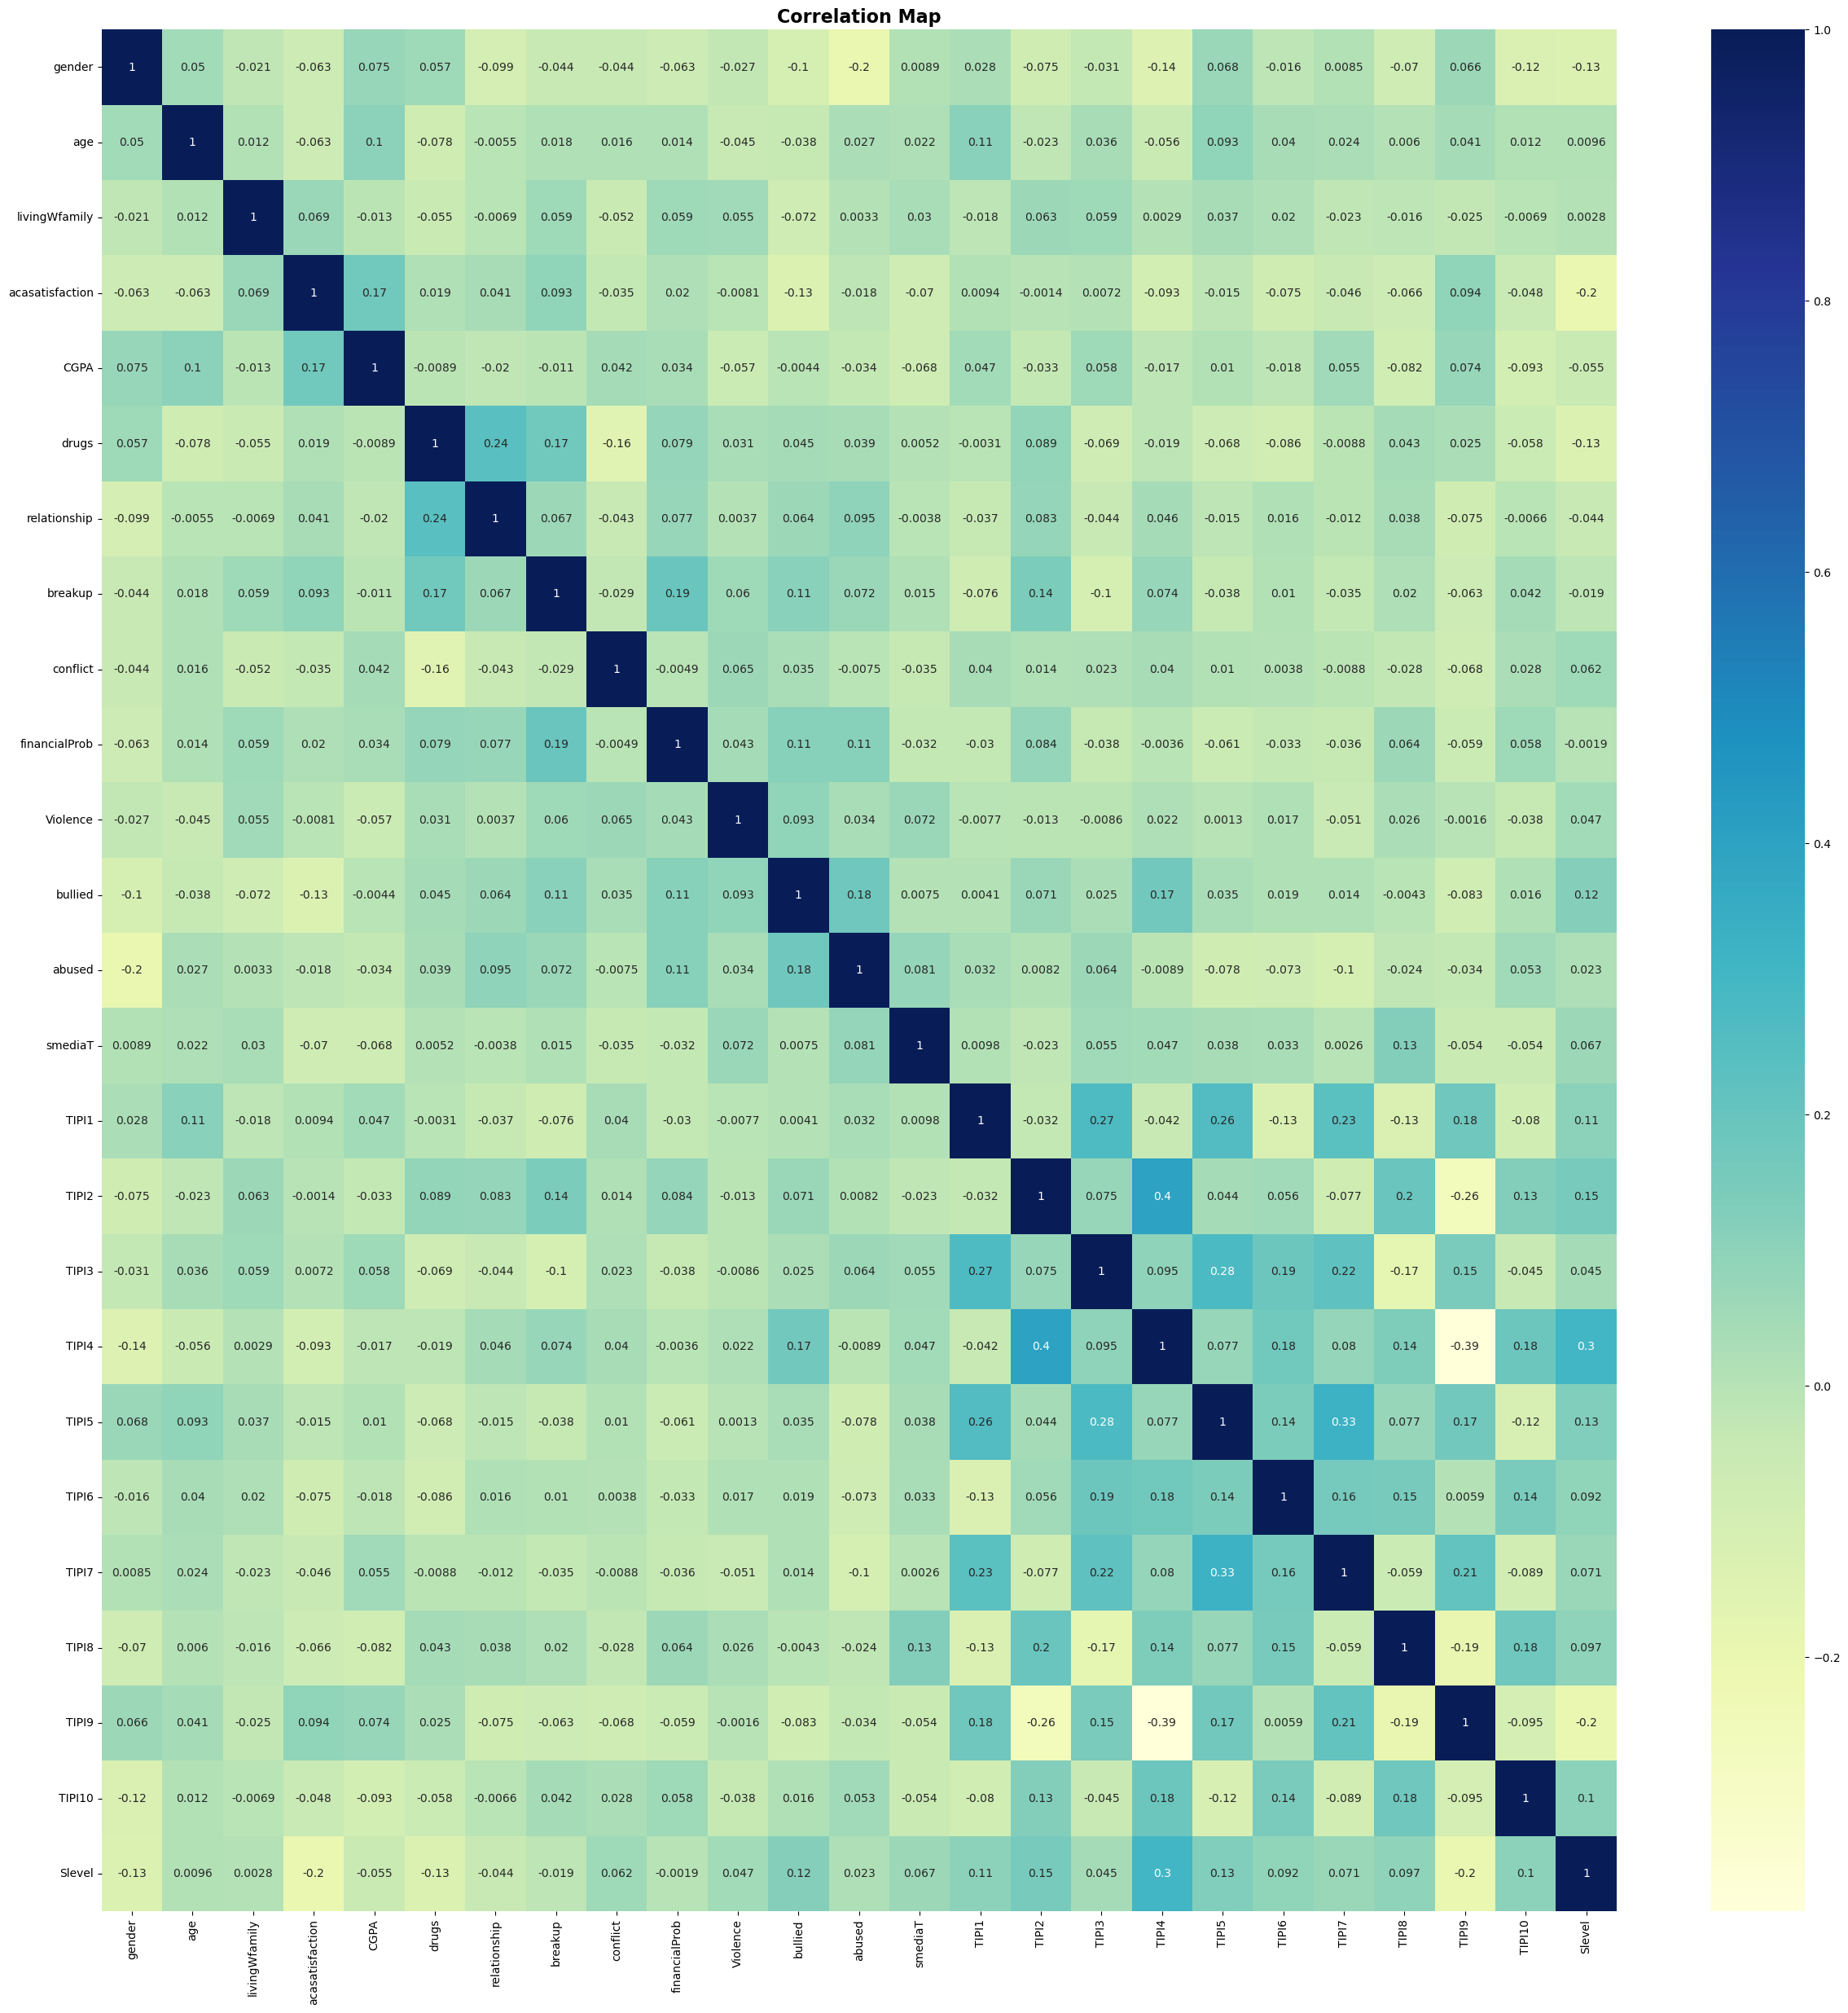

In [58]:
corr = stress.corr()
plt.figure(figsize=(30,30))
sns.heatmap(stress.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)

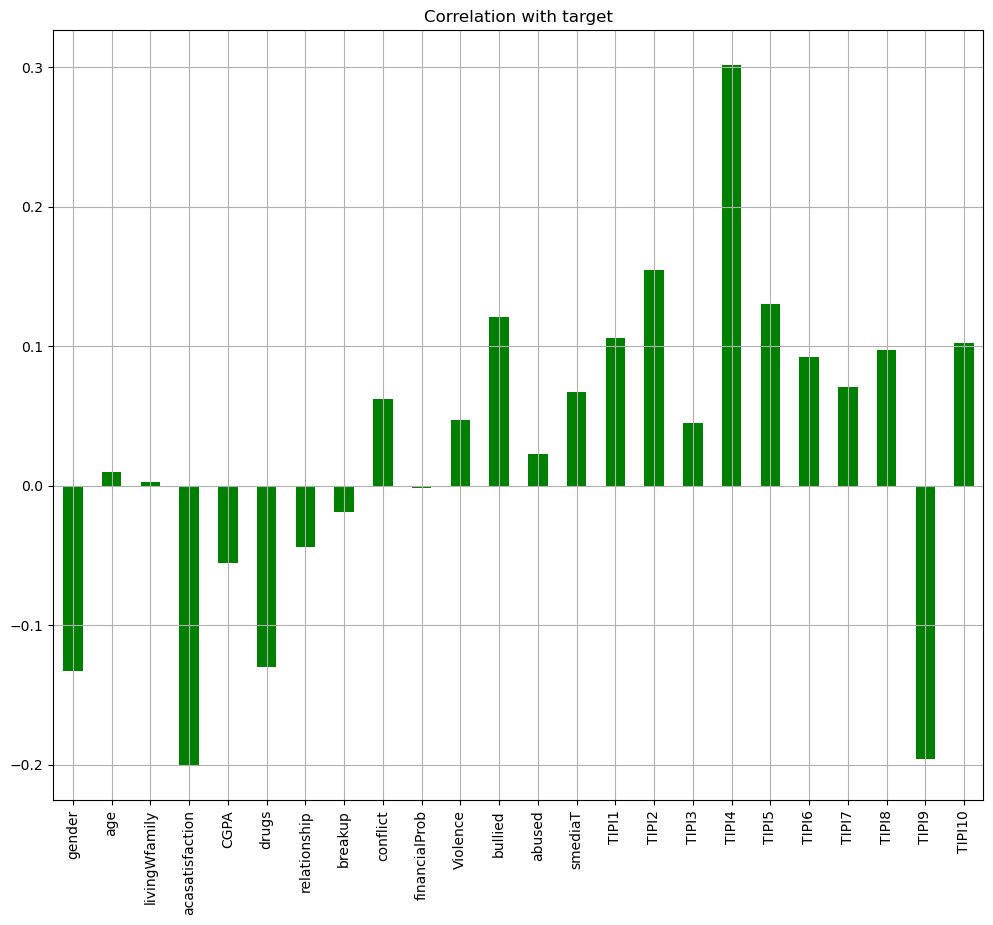

In [59]:
stress.drop('Slevel', axis=1).corrwith(stress.Slevel).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation with target",color="green");

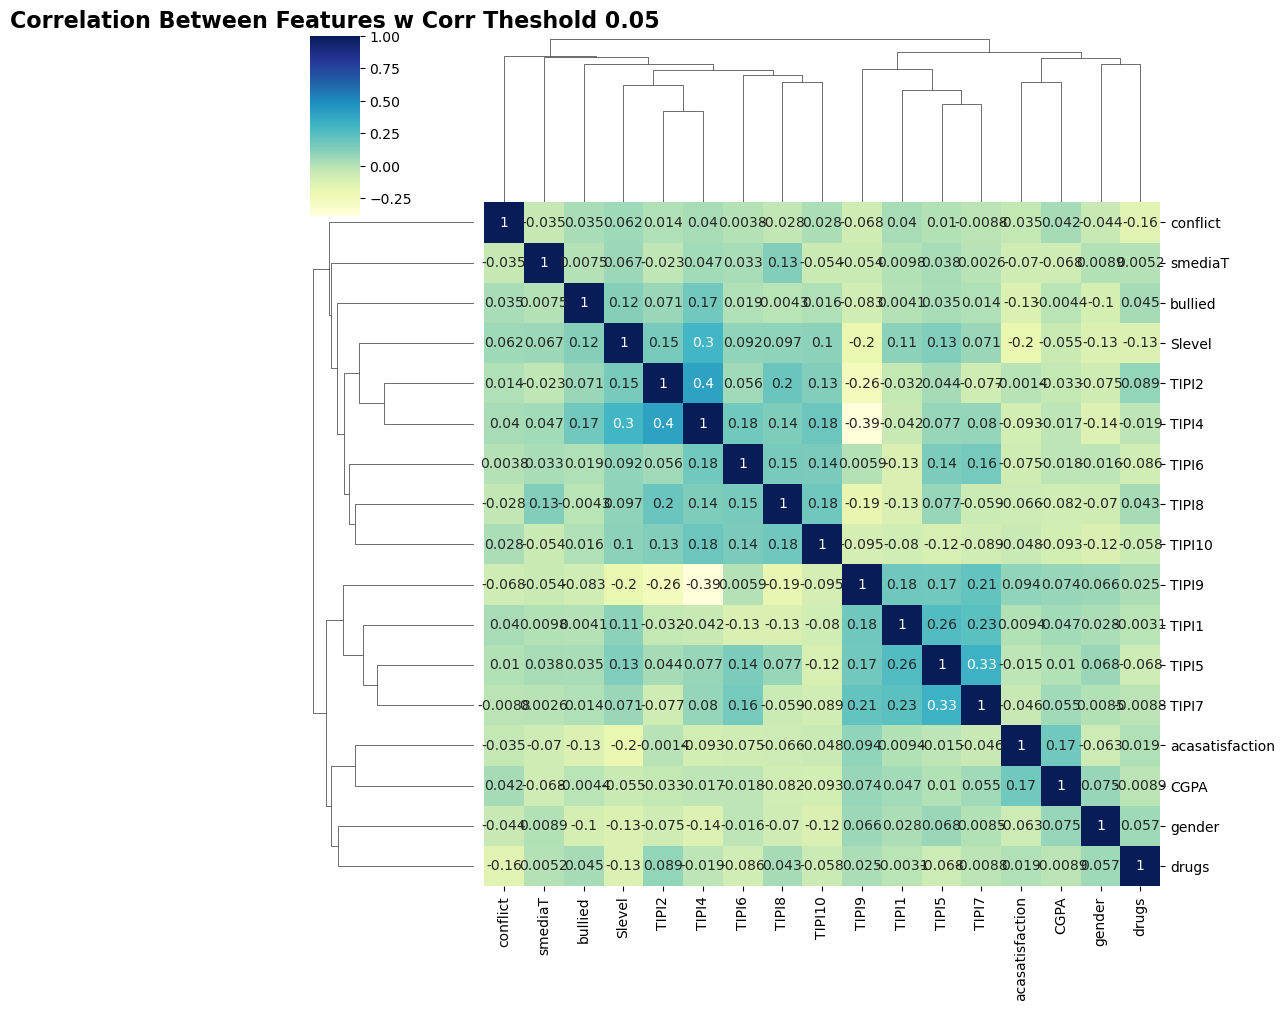

In [60]:
corr_matrix = stress.corr()
threshold = 0.05 
filtre = np.abs(corr_matrix["Slevel"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(stress[corr_features].corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation Between Features w Corr Theshold 0.05", fontweight = "bold", fontsize=16)
plt.show()

In [61]:
# #pair plot
# sns.pairplot(stress[corr_features], diag_kind = "kde", markers = "+", hue = "Slevel", palette='viridis')
# plt.show()

In [62]:
stress.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

In [63]:
stress1=stress.copy()
stress2=stress.copy()
stress3=stress.copy()
stress4=stress.copy()
stress5=stress.copy()

**Stress Split data**

In [64]:
target = stress['Slevel']
stress.drop('Slevel', inplace=True, axis=1) # drop target

### Scale the data

In [65]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(stress) #scales the minimum and maximum values to be 0 and 1 respectively
stress = scaler.transform(stress)
#x_test = scaler.transform(x_test)

### Recursive Feature Elimination (RFE) for Feature Selection in Python

>lr 0.835
>per 0.826
>Dect 0.839
>rf 0.835
>gbm 0.839


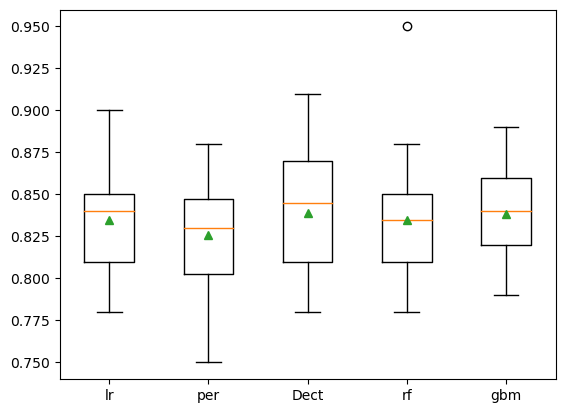

In [66]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

# get the dataset
def get_dataset(final_data):
 X_r, y_r = make_classification(n_samples=1000, n_features=24, n_informative=10, n_redundant=5, random_state=1)
 return X_r, y_r
 
# get a list of models to evaluate
def get_models():
 models = dict()
 # lr
 rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10)
 model = DecisionTreeClassifier()
 models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
 # perceptron
 rfe = RFE(estimator=Perceptron(), n_features_to_select=10)
 model = DecisionTreeClassifier()
 models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
 # cart
 rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
 model = DecisionTreeClassifier()
 models['Dect'] = Pipeline(steps=[('s',rfe),('m',model)])
 # rf
 rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
 model = DecisionTreeClassifier()
 models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
 # gbm
 rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=10)
 model = DecisionTreeClassifier()
 models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
 return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X_r, y_r):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X_r, y_r, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores
 
# define dataset
X_r, y_r = get_dataset(stress)
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
my_dict = {}

for name, model in models.items():
 scores = evaluate_model(model, X_r, y_r)
 results.append(scores)
 names.append(name)
 my_dict[name]=mean(scores)
 print('>%s %.3f' % (name, mean(scores)))
    
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [67]:
my_dict

{'lr': 0.8346666666666668,
 'per': 0.8256666666666665,
 'Dect': 0.839,
 'rf': 0.8349999999999999,
 'gbm': 0.8386666666666668}

In [68]:
max_value = max(my_dict, key=my_dict.get)
max_value

'Dect'

In [69]:
if max_value=='lr':
    rfe = RFE(estimator=LogisticRegression(),n_features_to_select=10)
elif max_value=='per':
    rfe = RFE(estimator=Perceptron(),n_features_to_select=10)
elif max_value=='Dect':
    rfe = RFE(estimator=DecisionTreeClassifier(),n_features_to_select=10)
elif max_value=='rf':
    rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=10)
else:
    rfe = RFE(estimator=GradientBoostingClassifier(),n_features_to_select=10)

In [70]:
# # report which features were selected by RFE
# rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=11)
# # fit RFE
x=rfe.fit_transform(stress, target)
y=rfe.fit(stress, target)
list = []
# final_data1, target
# #summarize all features
for i in range(stress.shape[1]):
    if rfe.support_[i]==False:
        list.append(i)
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))
# list

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 15.000
Column: 2, Selected False, Rank: 10.000
Column: 3, Selected False, Rank: 5.000
Column: 4, Selected False, Rank: 6.000
Column: 5, Selected False, Rank: 14.000
Column: 6, Selected False, Rank: 12.000
Column: 7, Selected False, Rank: 11.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 13.000
Column: 10, Selected False, Rank: 7.000
Column: 11, Selected False, Rank: 8.000
Column: 12, Selected False, Rank: 9.000
Column: 13, Selected False, Rank: 3.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected False, Rank: 2.000
Column: 21, Selected False, Rank: 4.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000


In [71]:
x

array([[1.        , 0.5       , 0.14285714, ..., 1.        , 0.14285714,
        0.14285714],
       [1.        , 1.        , 0.85714286, ..., 1.        , 0.14285714,
        0.71428571],
       [0.5       , 1.        , 0.28571429, ..., 0.71428571, 0.42857143,
        0.28571429],
       ...,
       [1.        , 0.        , 0.71428571, ..., 0.85714286, 0.71428571,
        0.14285714],
       [0.5       , 1.        , 0.57142857, ..., 0.57142857, 0.57142857,
        0.57142857],
       [0.5       , 0.        , 0.85714286, ..., 0.71428571, 0.85714286,
        0.42857143]])

In [72]:
y

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)

In [73]:
stress= pd.DataFrame(x)
stress

0    1         2         3         4         5         6         7  \
0    1.0  0.5  0.142857  0.571429  1.000000  1.000000  1.000000  1.000000   
1    1.0  1.0  0.857143  0.285714  1.000000  0.714286  0.571429  1.000000   
2    0.5  1.0  0.285714  1.000000  0.285714  0.714286  0.857143  0.714286   
3    0.5  1.0  0.142857  0.428571  0.571429  0.857143  0.571429  0.857143   
4    1.0  1.0  0.285714  0.857143  0.857143  0.714286  0.714286  0.714286   
..   ...  ...       ...       ...       ...       ...       ...       ...   
566  1.0  0.0  1.000000  1.000000  0.714286  0.714286  0.714286  0.714286   
567  1.0  1.0  0.571429  0.571429  0.571429  0.571429  0.571429  0.571429   
568  1.0  0.0  0.714286  0.714286  0.714286  1.000000  0.857143  0.857143   
569  0.5  1.0  0.571429  0.714286  0.285714  0.571429  0.571429  0.571429   
570  0.5  0.0  0.857143  0.857143  0.714286  0.714286  0.714286  0.714286   

            8         9  
0    0.142857  0.142857  
1    0.142857  0.714286  
2    0.428571  0.285714  
3    0.857143  0.142857  
4    0.428571  0.428571  
..        ...       ...  
566  1.000000  0.285714  
567  0.571429  0.571429  
568  0.714286  0.142857  
569  0.571429  0.571429  
570  0.857143  0.428571  

[571 rows x 10 columns]

### Split the data in Train & Test

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [75]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(stress, target, test_size=.2,random_state=42)

In [76]:
print(f'x_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}, y_test: {y_test.shape}')

x_train: (456, 10), y_train: (456,)
x_test: (115, 10), y_test: (115,)


### smooth technique

In [77]:
from collections import Counter
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state = 42)

In [78]:
X_train_res, y_train_res= smote.fit_resample(X_train,y_train.ravel())

In [79]:
print('Before SMOTE : ',Counter(y_train))
print('After SMOTE : ',Counter(y_train_res))

Before SMOTE :  Counter({1: 273, 0: 183})
After SMOTE :  Counter({1: 273, 0: 273})


#### Lazypredict is a Python package that aims to automate the machine learning modeling process. 

In [80]:
!pip install lazypredict

In [81]:
from lazypredict.Supervised import LazyClassifier

In [82]:
from lazypredict.Supervised import LazyClassifier

# Create a LazyClassifier instance and fit the training data
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=True,
                     random_state=12,
                     classifiers='all')
model, predictions = clf.fit(X_train_res, x_test,y_train_res, y_test)
model

100%|██████████| 29/29 [00:02<00:00, 13.91it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearSVC                          0.66               0.66     0.66      0.66   
RidgeClassifierCV                  0.66               0.66     0.66      0.66   
CalibratedClassifierCV             0.66               0.66     0.66      0.66   
LogisticRegression                 0.66               0.66     0.66      0.66   
LinearDiscriminantAnalysis         0.66               0.66     0.66      0.66   
RidgeClassifier                    0.66               0.66     0.66      0.66   
NearestCentroid                    0.65               0.65     0.65      0.65   
GaussianNB                         0.63               0.64     0.64      0.63   
DecisionTreeClassifier             0.61               0.61     0.61      0.61   
ExtraTreesClassifier               0.59               0.59     0.59      0.59   
Perceptron                         0.58               0.58     0.58      0.58   
BernoulliNB                        0.58               0.58     0.58      0.58   
XGBClassifier                      0.59               0.58     0.58      0.59   
NuSVC                              0.58               0.58     0.58      0.58   
RandomForestClassifier             0.59               0.58     0.58      0.58   
SGDClassifier                      0.57               0.58     0.58      0.57   
SVC                                0.58               0.58     0.58      0.58   
AdaBoostClassifier                 0.57               0.56     0.56      0.57   
LGBMClassifier                     0.57               0.56     0.56      0.57   
QuadraticDiscriminantAnalysis      0.56               0.55     0.55      0.56   
BaggingClassifier                  0.56               0.55     0.55      0.55   
KNeighborsClassifier               0.54               0.53     0.53      0.54   
LabelSpreading                     0.52               0.52     0.52      0.52   
LabelPropagation                   0.52               0.52     0.52      0.52   
ExtraTreeClassifier                0.51               0.51     0.51      0.51   
DummyClassifier                    0.46               0.50     0.50      0.29   
PassiveAggressiveClassifier        0.48               0.47     0.47      0.47   

                               Time Taken  
Model                                      
LinearSVC                            0.08  
RidgeClassifierCV                    0.01  
CalibratedClassifierCV               0.13  
LogisticRegression                   0.02  
LinearDiscriminantAnalysis           0.04  
RidgeClassifier                      0.02  
NearestCentroid                      0.01  
GaussianNB                           0.01  
DecisionTreeClassifier               0.01  
ExtraTreesClassifier                 0.18  
Perceptron                           0.01  
BernoulliNB                          0.01  
XGBClassifier                        0.46  
NuSVC                                0.03  
RandomForestClassifier               0.22  
SGDClassifier                        0.01  
SVC                                  0.03  
AdaBoostClassifier                   0.11  
LGBMClassifier                       0.45  
QuadraticDiscriminantAnalysis        0.01  
BaggingClassifier                    0.04  
KNeighborsClassifier                 0.02  
LabelSpreading                       0.06  
LabelPropagation                     0.05  
ExtraTreeClassifier                  0.01  
DummyClassifier                      0.01  
PassiveAggressiveClassifier          0.01

In [83]:
predictions.head()

AdaBoostClassifier  BaggingClassifier  BernoulliNB  CalibratedClassifierCV  \
0                   0                  1            0                       0   
1                   0                  0            0                       0   
2                   0                  0            0                       0   
3                   1                  1            1                       1   
4                   0                  0            0                       0   

   DecisionTreeClassifier  DummyClassifier  ExtraTreeClassifier  \
0                       1                0                    0   
1                       0                0                    0   
2                       0                0                    1   
3                       1                0                    0   
4                       1                0                    1   

   ExtraTreesClassifier  GaussianNB  KNeighborsClassifier  ...  \
0                     0           0                     1  ...   
1                     0           0                     0  ...   
2                     0           0                     0  ...   
3                     1           1                     1  ...   
4                     0           0                     0  ...   

   PassiveAggressiveClassifier  Perceptron  QuadraticDiscriminantAnalysis  \
0                            1           0                              0   
1                            0           1                              0   
2                            1           0                              0   
3                            1           0                              1   
4                            0           0                              0   

   RandomForestClassifier  RidgeClassifier  RidgeClassifierCV  SGDClassifier  \
0                       0                0                  0              0   
1                       0                0                  0              0   
2                       0                0                  0              1   
3                       1                1                  1              1   
4                       0                0                  0              0   

   SVC  XGBClassifier  LGBMClassifier  
0    0              0               0  
1    0              0               0  
2    0              0               0  
3    1              1               1  
4    0              0               0  

[5 rows x 27 columns]

# Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train_res, y_train_res)

DecisionTreeClassifier()

[Text(0.5459653253424658, 0.9642857142857143, 'X[4] <= 0.853\ngini = 0.5\nsamples = 546\nvalue = [273, 273]'),
 Text(0.3126070205479452, 0.8928571428571429, 'X[8] <= 0.577\ngini = 0.479\nsamples = 359\nvalue = [216, 143]'),
 Text(0.14148116438356165, 0.8214285714285714, 'X[6] <= 0.588\ngini = 0.498\nsamples = 144\nvalue = [67, 77]'),
 Text(0.06592465753424658, 0.75, 'X[2] <= 0.674\ngini = 0.425\nsamples = 62\nvalue = [19, 43]'),
 Text(0.039383561643835614, 0.6785714285714286, 'X[7] <= 0.214\ngini = 0.474\nsamples = 44\nvalue = [17, 27]'),
 Text(0.032534246575342464, 0.6071428571428571, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.046232876712328765, 0.6071428571428571, 'X[9] <= 0.357\ngini = 0.459\nsamples = 42\nvalue = [15, 27]'),
 Text(0.0273972602739726, 0.5357142857142857, 'X[2] <= 0.603\ngini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(0.02054794520547945, 0.4642857142857143, 'X[0] <= 0.25\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.0136986301369863, 0.39285

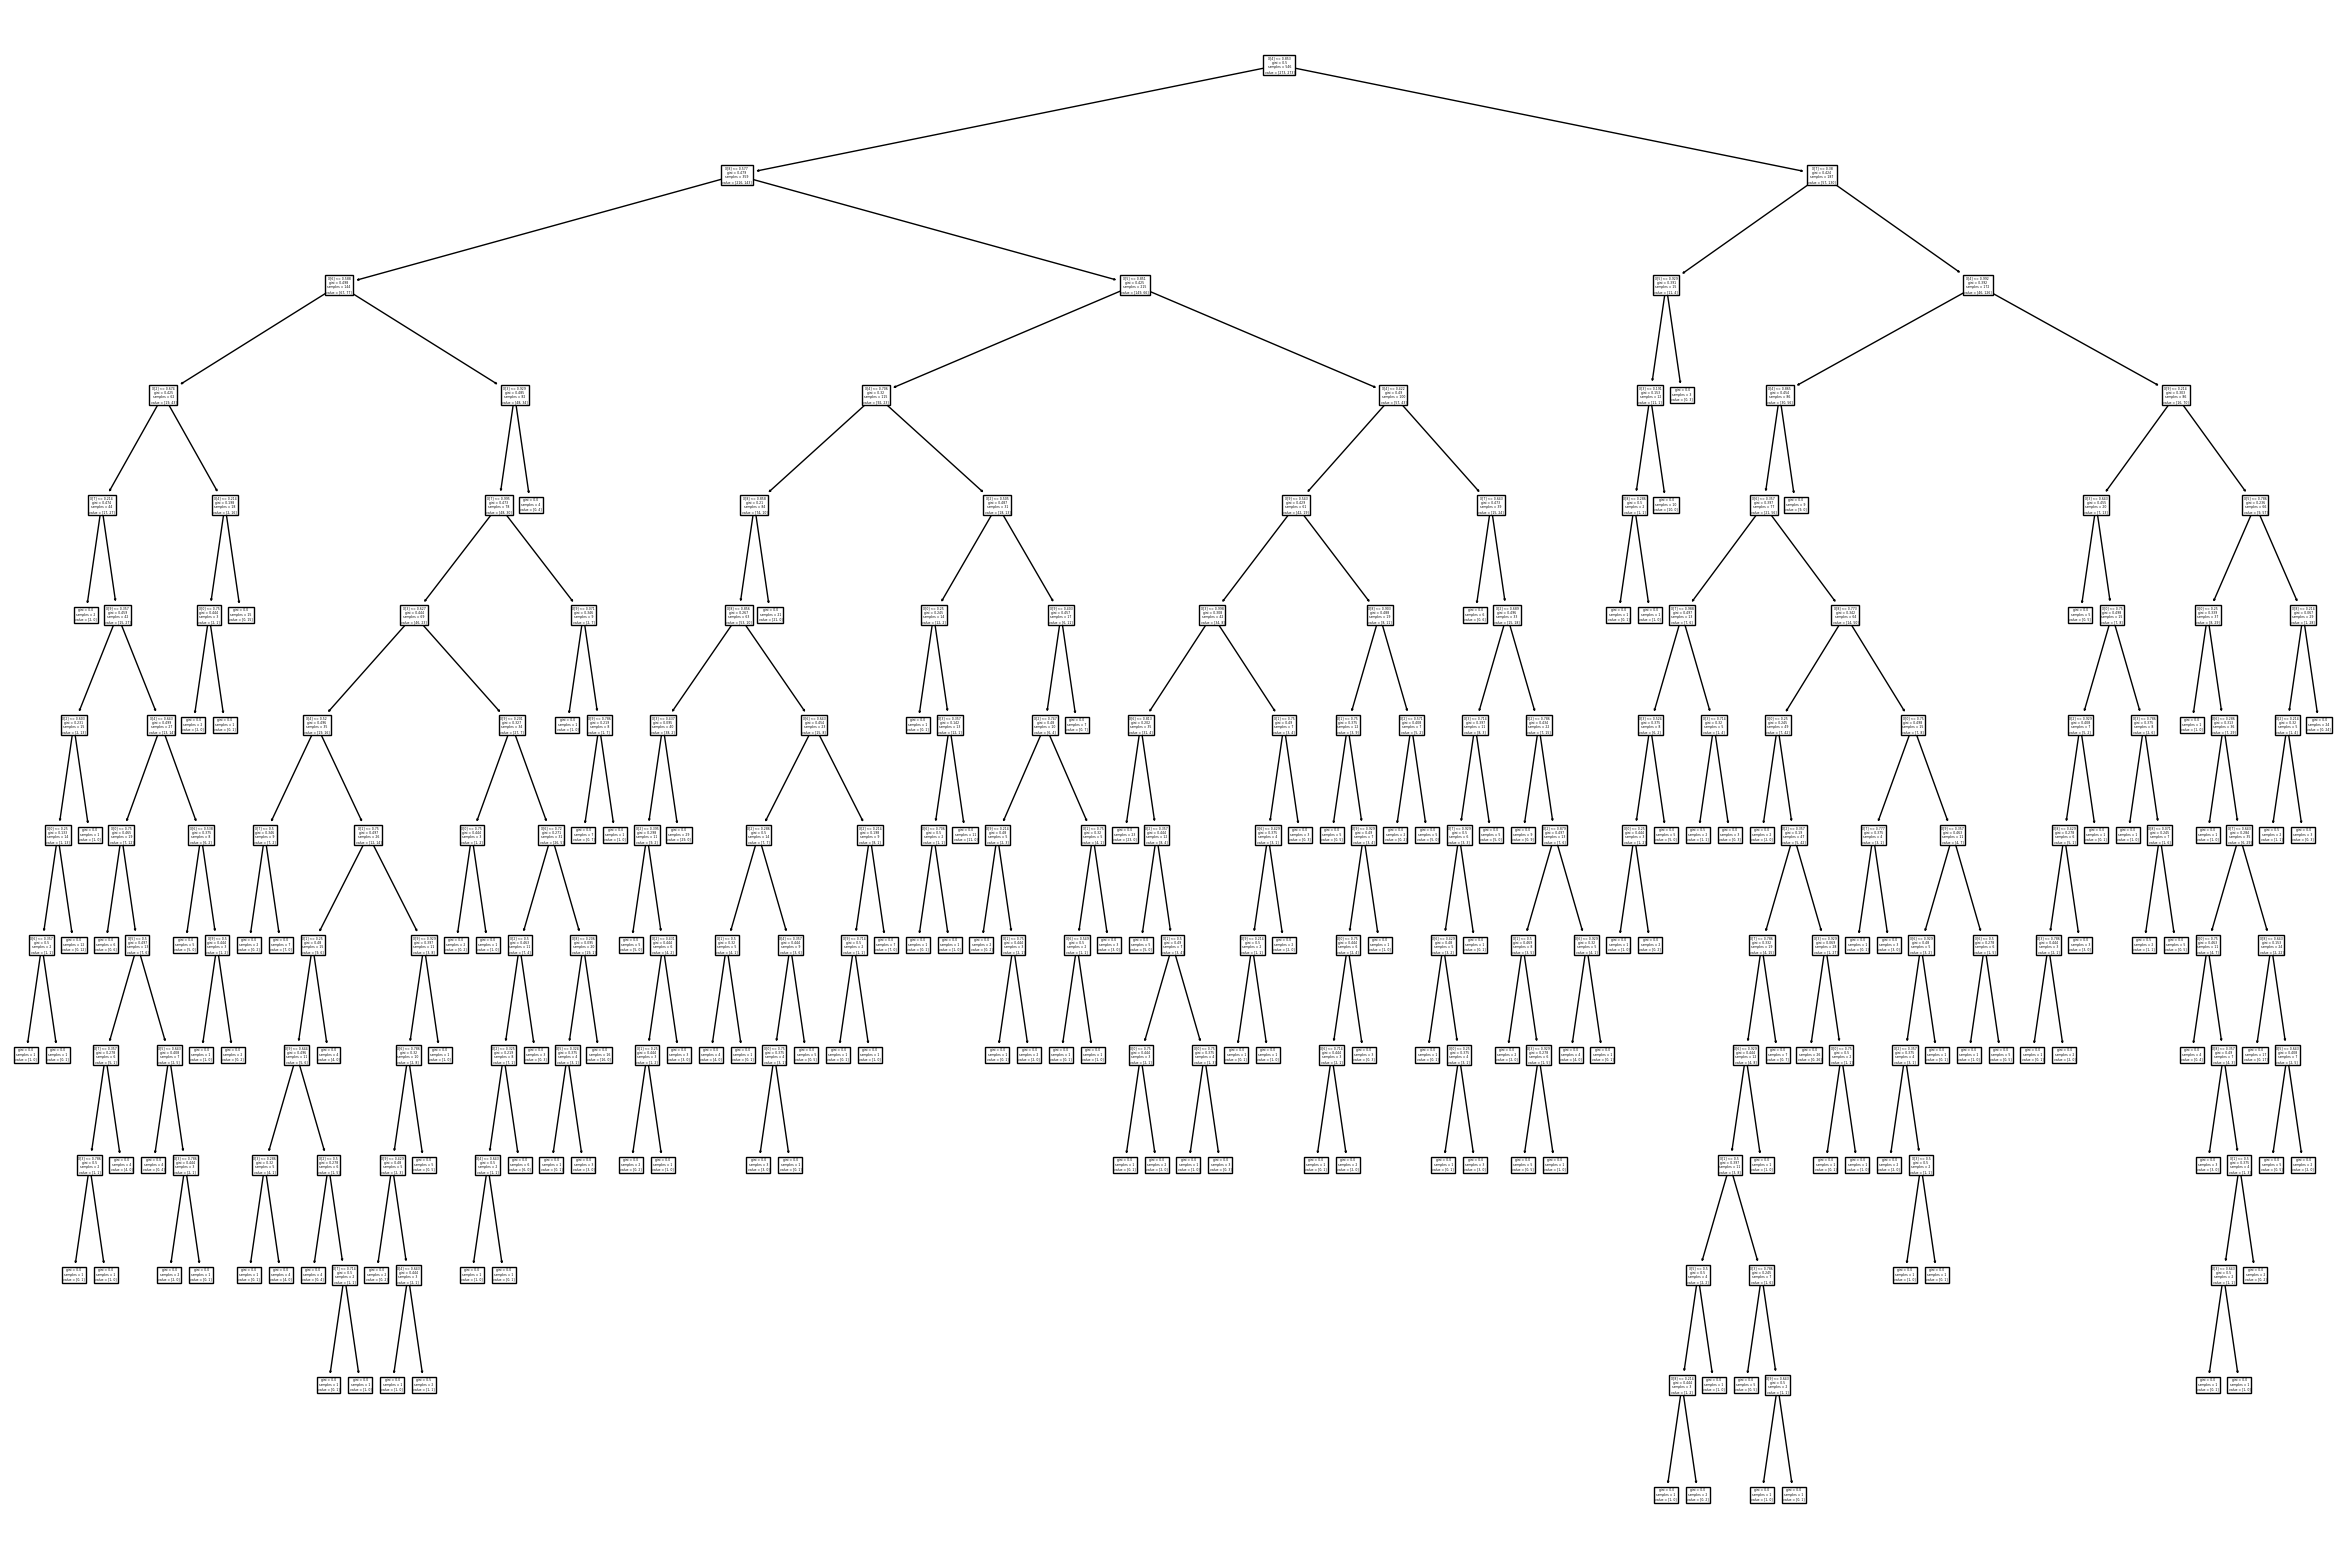

In [85]:
from sklearn import tree
plt.figure(figsize=(30,20))
tree.plot_tree(clf)

[Text(0.5459653253424658, 0.9642857142857143, '4 <= 0.853\ngini = 0.5\nsamples = 546\nvalue = [273, 273]'),
 Text(0.3126070205479452, 0.8928571428571429, '8 <= 0.577\ngini = 0.479\nsamples = 359\nvalue = [216, 143]'),
 Text(0.14148116438356165, 0.8214285714285714, '6 <= 0.588\ngini = 0.498\nsamples = 144\nvalue = [67, 77]'),
 Text(0.06592465753424658, 0.75, '2 <= 0.674\ngini = 0.425\nsamples = 62\nvalue = [19, 43]'),
 Text(0.039383561643835614, 0.6785714285714286, '7 <= 0.214\ngini = 0.474\nsamples = 44\nvalue = [17, 27]'),
 Text(0.032534246575342464, 0.6071428571428571, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.046232876712328765, 0.6071428571428571, '9 <= 0.357\ngini = 0.459\nsamples = 42\nvalue = [15, 27]'),
 Text(0.0273972602739726, 0.5357142857142857, '2 <= 0.603\ngini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(0.02054794520547945, 0.4642857142857143, '0 <= 0.25\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.0136986301369863, 0.39285714285714285, '6 <= 0.35

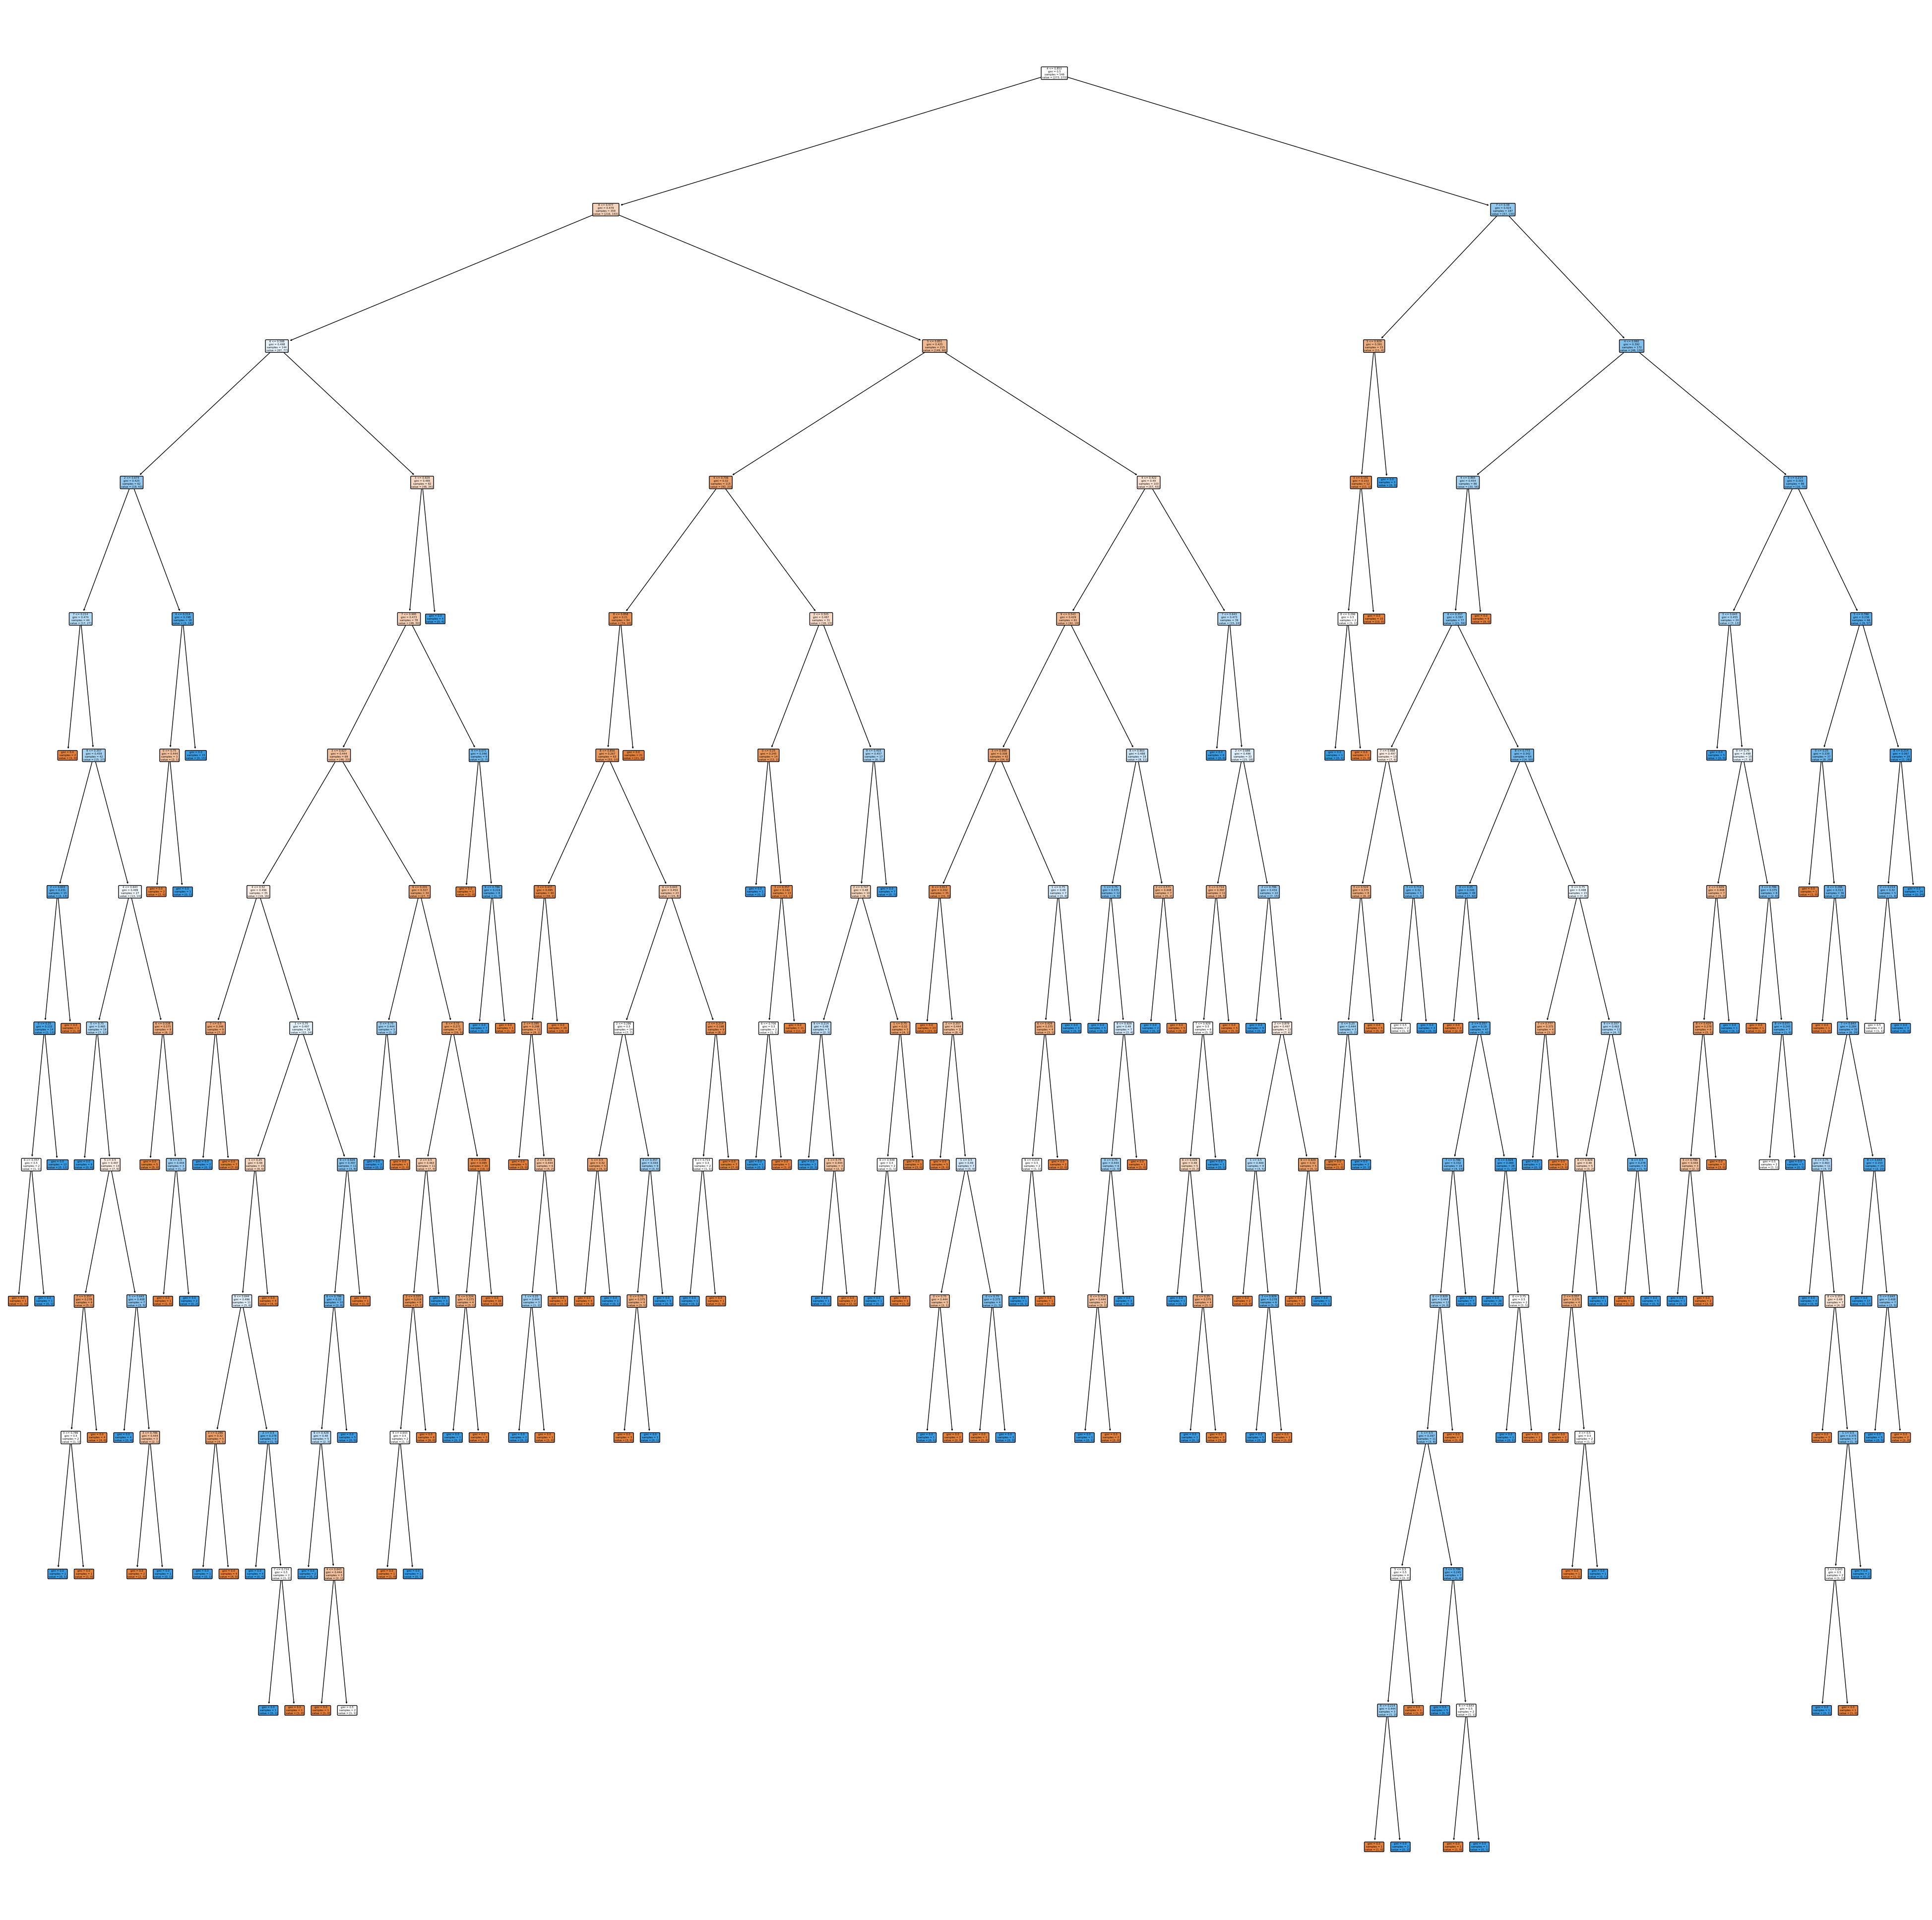

In [86]:
plt.figure(figsize=(50,50))
tree.plot_tree(clf,feature_names=stress.columns,rounded=True,filled=True)

In [87]:
print ("Traning Accuracy: ", clf.score(X_train_res, y_train_res)*100) # Check training accuracy
print ("Testing Accuracy: ", clf.score(x_test,y_test)*100) # Check testing accuracy

Traning Accuracy:  99.26739926739927
Testing Accuracy:  60.86956521739131


In [88]:
pred = clf.predict(x_test)
accuracy_score(pred,y_test)*100

60.86956521739131

In [89]:
print(classification_report(y_test,pred)) #main

              precision    recall  f1-score   support

           0       0.57      0.60      0.59        53
           1       0.64      0.61      0.63        62

    accuracy                           0.61       115
   macro avg       0.61      0.61      0.61       115
weighted avg       0.61      0.61      0.61       115



In [90]:
cm=confusion_matrix(y_test,pred)
cm

array([[32, 21],
       [24, 38]])

<AxesSubplot:>

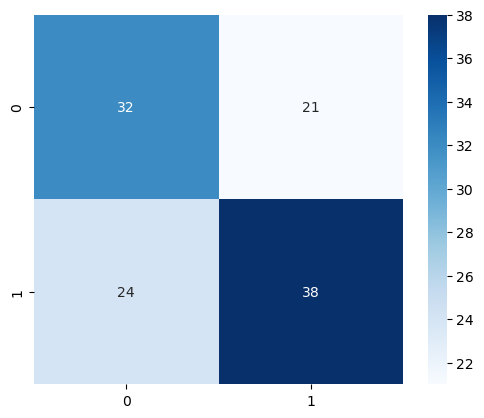

In [91]:
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)

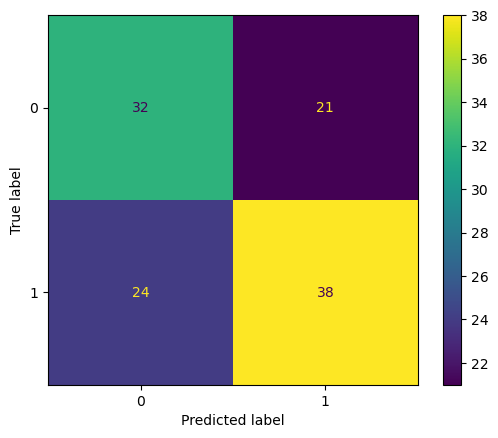

In [92]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,x_test,y_test)

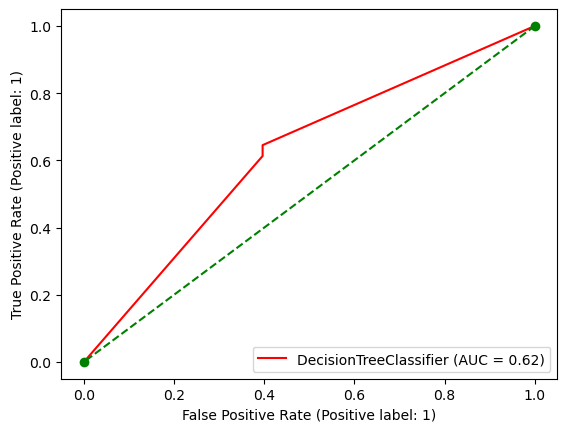

In [93]:
plot_roc_curve(clf,x_test,y_test,color='red')
plt.plot([1,0],[1,0],'go--')

## Finding an appropiate n_neighbors value for kNN classifier by uniform and distance weight function:

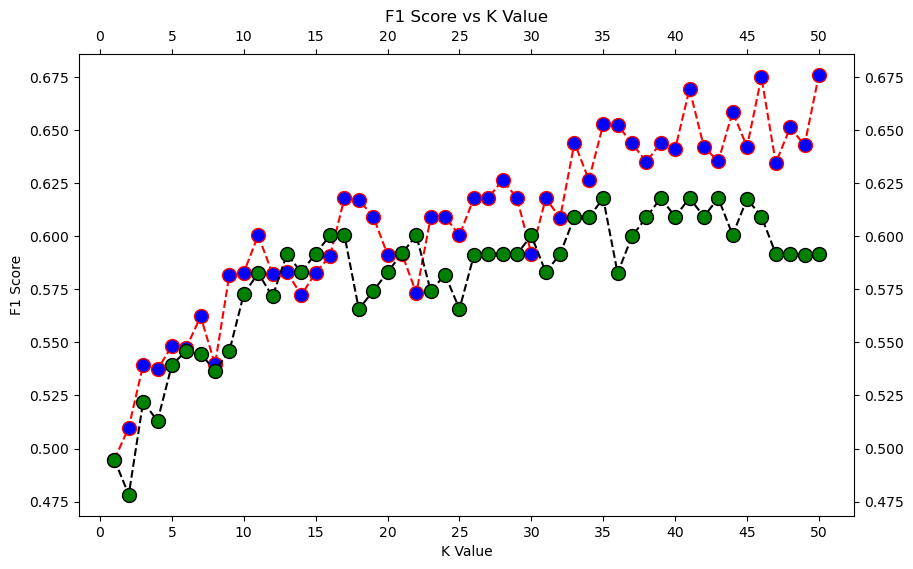

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
f1s = []
f2s = []
for i in range(1, 51):
    knct = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knct.fit(X_train_res, y_train_res)
    pred_i = knct.predict(x_test)
    f1s.append(f1_score(y_test, pred_i, average='weighted'))
    
    knct2 = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knct2.fit(X_train_res, y_train_res)
    pred_i2 = knct2.predict(x_test)
    f2s.append(f1_score(y_test, pred_i2, average='weighted'))
           
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(range(1, 51), f2s, color='black', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('F1 Score vs K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')
plt.xticks(range(0, 51, 5))
plt.tick_params(labeltop=True, labelright=True, top=True, right=True)

In [95]:
f1_max = 0
f2_max = 0

for i in range(0,50):
    if f1s[i]>f1_max or f2s[i]>f2_max:
        f1_max = f1s[i]
        f2_max = f2s[i]
        x=i
    print(i,f1s[i],f2s[i])

print(f1_max,f2_max,x)

0 0.4948054361097839 0.4948054361097839
1 0.5099193438049568 0.4782608695652174
2 0.5394105773646115 0.5220298444349742
3 0.5373161250399101 0.5130434782608696
4 0.5483065388981283 0.5394105773646115
5 0.5474841526605118 0.5460251491901108
6 0.5622073578595317 0.5446956521739129
7 0.5396184594337731 0.5366543529984948
8 0.5819079471253383 0.5460251491901108
9 0.5828612009784582 0.572740416734527
10 0.6004250151791136 0.5826086956521739
11 0.5822930639943186 0.5716238357910614
12 0.5831771765448995 0.5915527761535234
13 0.5722356627727472 0.5830521897521185
14 0.5828612009784582 0.5918621248932742
15 0.5906242703472407 0.6004250151791136
16 0.6179710144927536 0.6004250151791136
17 0.6171019753281255 0.5656793643251234
18 0.6092881335848087 0.5741720432238862
19 0.591304347826087 0.5830521897521185
20 0.5917371244035345 0.5919231617441334
21 0.5732040265322297 0.6004250151791136
22 0.6089335090831607 0.5741720432238862
23 0.6091100127267882 0.5819079471253383
24 0.6004250151791136 0.5656

# kNN Classification

In [96]:
neigh_classifier = KNeighborsClassifier(n_neighbors=6,weights='distance')

neigh_classifier.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [97]:
print ("Traning Accuracy: ", neigh_classifier.score(X_train_res, y_train_res)*100) # Check training accuracy
print ("Testing Accuracy: ", neigh_classifier.score(x_test,y_test)*100) # Check testing accuracy

Traning Accuracy:  99.26739926739927
Testing Accuracy:  54.78260869565217


In [98]:
pred=  neigh_classifier.predict(x_test)
accuracy_score(pred,y_test)*100

54.78260869565217

In [99]:
print(classification_report(y_test,pred)) #main

              precision    recall  f1-score   support

           0       0.51      0.47      0.49        53
           1       0.58      0.61      0.59        62

    accuracy                           0.55       115
   macro avg       0.54      0.54      0.54       115
weighted avg       0.55      0.55      0.55       115



In [100]:
cm=confusion_matrix(y_test,pred)
cm

array([[25, 28],
       [24, 38]])

<AxesSubplot:>

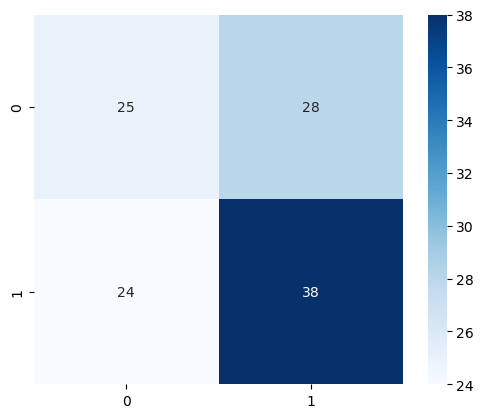

In [101]:
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)

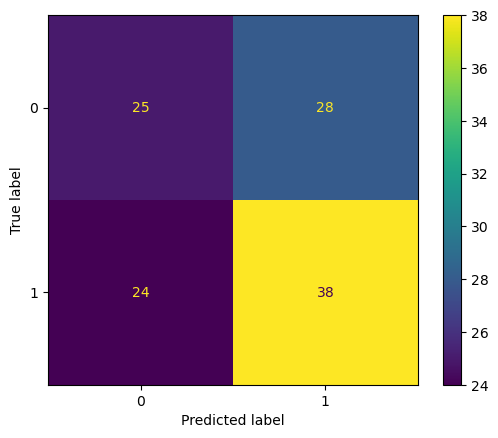

In [102]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(neigh_classifier,x_test,y_test)

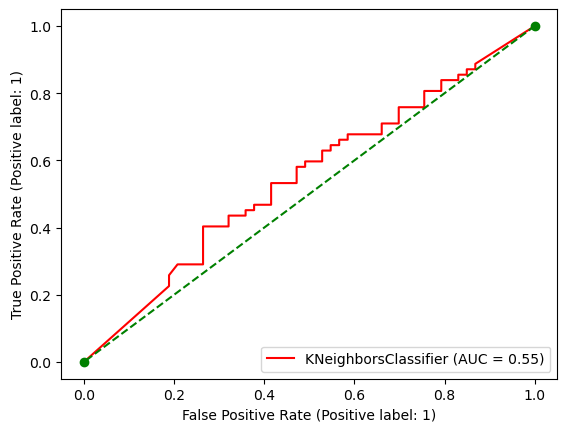

In [103]:
plot_roc_curve(neigh_classifier,x_test,y_test,color='red')
plt.plot([1,0],[1,0],'go--')

# Logistic Regression

In [104]:
logist=LogisticRegression(C=1.0,random_state=2,max_iter=100)
logist.fit(X_train_res, y_train_res)

LogisticRegression(random_state=2)

In [105]:
print ("Traning Accuracy: ", logist.score(X_train_res, y_train_res)*100) # Check training accuracy
print ("Testing Accuracy: ", logist.score(x_test, y_test)*100) # Check testing accuracy

Traning Accuracy:  66.11721611721612
Testing Accuracy:  66.95652173913044


In [106]:
pred=  logist.predict(x_test)
accuracy_score(pred,y_test)*100

66.95652173913044

In [107]:
print(classification_report(y_test,pred)) #main

              precision    recall  f1-score   support

           0       0.63      0.68      0.65        53
           1       0.71      0.66      0.68        62

    accuracy                           0.67       115
   macro avg       0.67      0.67      0.67       115
weighted avg       0.67      0.67      0.67       115



In [108]:
cm=confusion_matrix(y_test,pred)
cm

array([[36, 17],
       [21, 41]])

<AxesSubplot:>

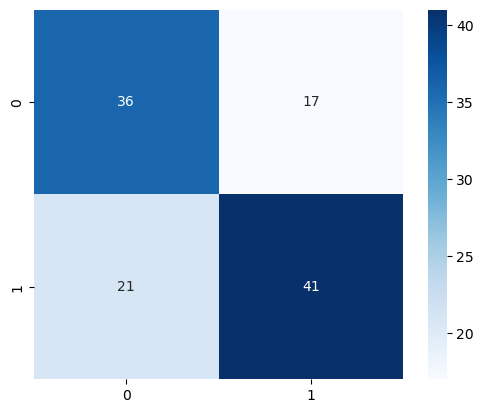

In [109]:
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)

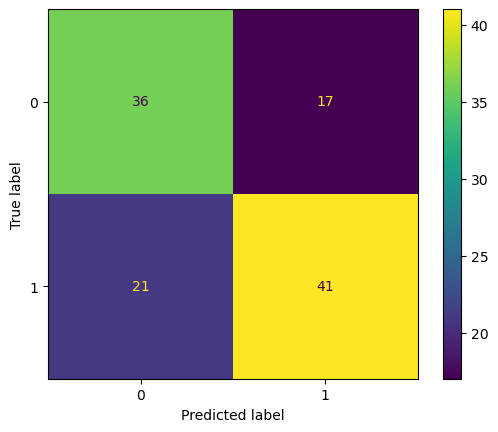

In [110]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logist,x_test,y_test)

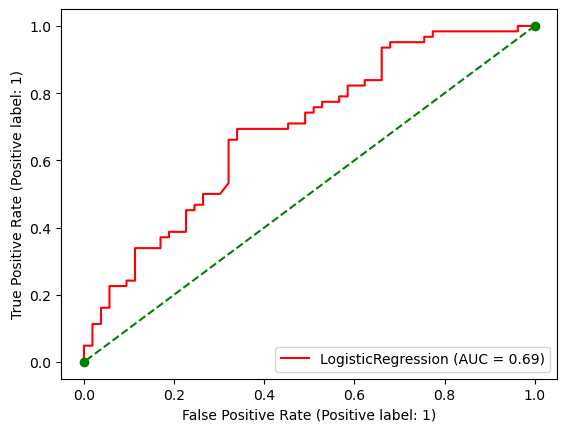

In [111]:
plot_roc_curve(logist,x_test,y_test,color='red')
plt.plot([1,0],[1,0],'go--')

# XGBoost Classifier (Extreme Gradient Boosting)

In [112]:
import xgboost 
from xgboost import XGBClassifier

In [113]:
xgb = XGBClassifier()

In [114]:
xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [115]:
print ("Traning Accuracy: ", xgb.score(X_train_res, y_train_res)*100) # Check training accuracy
print ("Testing Accuracy: ", xgb.score(x_test,y_test)*100) # Check testing accuracy

Traning Accuracy:  99.26739926739927
Testing Accuracy:  59.130434782608695


In [116]:
pred=  xgb.predict(x_test)
accuracy_score(pred,y_test)*100

59.130434782608695

In [117]:
print(classification_report(y_test,pred)) #main

              precision    recall  f1-score   support

           0       0.57      0.49      0.53        53
           1       0.61      0.68      0.64        62

    accuracy                           0.59       115
   macro avg       0.59      0.58      0.58       115
weighted avg       0.59      0.59      0.59       115



In [118]:
cm=confusion_matrix(y_test,pred)
cm

array([[26, 27],
       [20, 42]])

<AxesSubplot:>

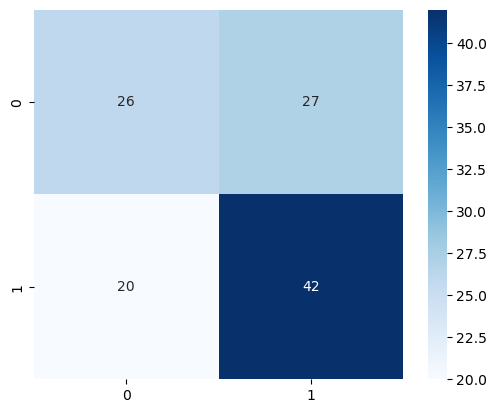

In [119]:
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)

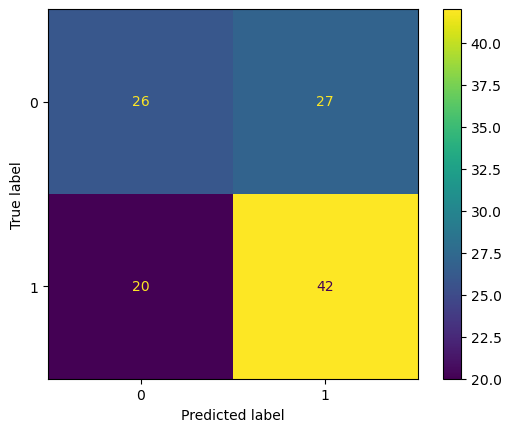

In [120]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb,x_test,y_test)

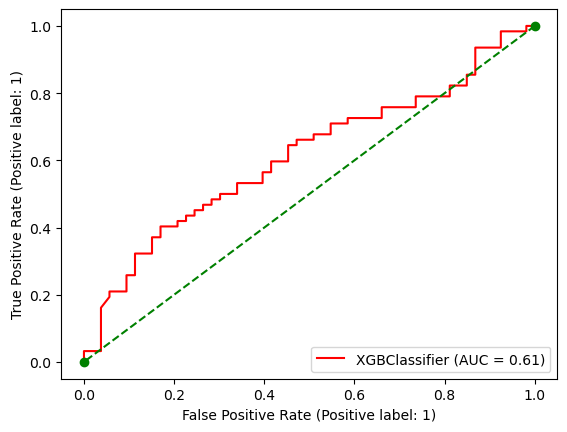

In [121]:
plot_roc_curve(xgb,x_test,y_test,color='red')
plt.plot([1,0],[1,0],'go--')

# Support vector classifier

In [122]:
from sklearn.svm import SVC # support vector classifier
# from sklearn.svm import SVR # support vector REGRESSOR
svm1 = SVC(kernel='linear')

In [123]:
svm1.fit(X_train_res, y_train_res)

SVC(kernel='linear')

In [124]:
print ("Traning Accuracy: ", svm1.score(X_train_res, y_train_res)*100) # Check training accuracy
print ("Testing Accuracy: ", svm1.score(x_test,y_test)*100) # Check testing accuracy

Traning Accuracy:  66.30036630036629
Testing Accuracy:  66.08695652173913


In [125]:
pred = svm1.predict(x_test)
accuracy_score(pred,y_test)*100

66.08695652173913

In [126]:
print(classification_report(y_test,pred)) #main

              precision    recall  f1-score   support

           0       0.62      0.68      0.65        53
           1       0.70      0.65      0.67        62

    accuracy                           0.66       115
   macro avg       0.66      0.66      0.66       115
weighted avg       0.66      0.66      0.66       115



In [127]:
cm=confusion_matrix(y_test,pred)
cm

array([[36, 17],
       [22, 40]])

In [128]:
cm=confusion_matrix(y_test,pred)
cm

array([[36, 17],
       [22, 40]])

<AxesSubplot:>

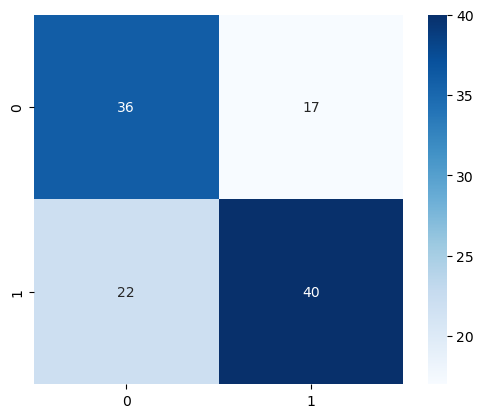

In [129]:
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)

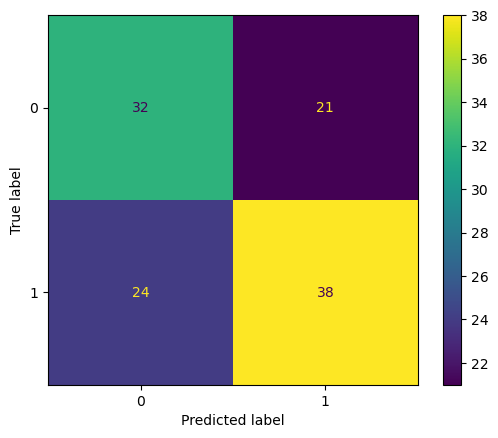

In [130]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,x_test,y_test)

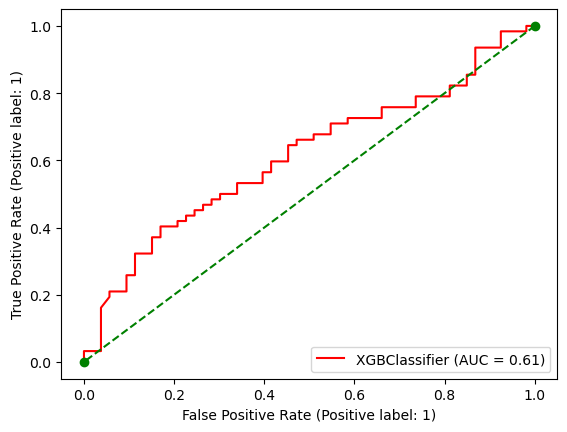

In [131]:
plot_roc_curve(xgb,x_test,y_test,color='red')
plt.plot([1,0],[1,0],'go--')

# support vector REGRESSOR

In [132]:
from sklearn.svm import SVR 
svm2 = SVC(kernel='linear')
svm2.fit(X_train_res, y_train_res)

SVC(kernel='linear')

In [133]:
print ("Traning Accuracy: ", svm2.score(X_train_res, y_train_res)*100) # Check training accuracy
print ("Testing Accuracy: ", svm2.score(x_test,y_test)*100) # Check testing accuracy

Traning Accuracy:  66.30036630036629
Testing Accuracy:  66.08695652173913


In [134]:
pred=  svm2.predict(x_test)
accuracy_score(pred,y_test)*100

66.08695652173913

In [135]:
print(classification_report(y_test,pred)) #main

              precision    recall  f1-score   support

           0       0.62      0.68      0.65        53
           1       0.70      0.65      0.67        62

    accuracy                           0.66       115
   macro avg       0.66      0.66      0.66       115
weighted avg       0.66      0.66      0.66       115



In [136]:
cm=confusion_matrix(y_test,pred)
cm

array([[36, 17],
       [22, 40]])

<AxesSubplot:>

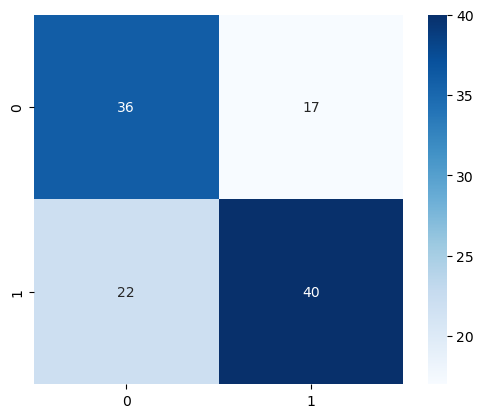

In [137]:
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)

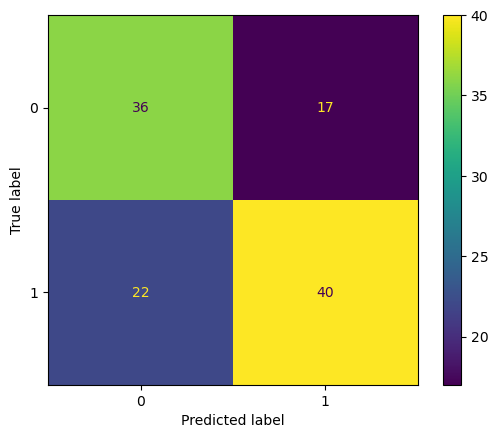

In [138]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm2,x_test,y_test)

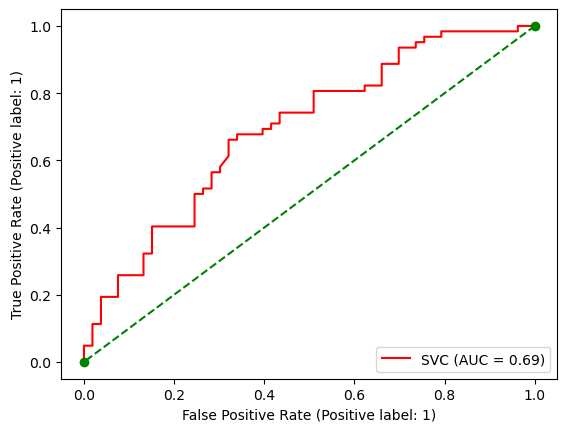

In [139]:
plot_roc_curve(svm2,x_test,y_test,color='red')
plt.plot([1,0],[1,0],'go--')

In [140]:
svm3 = SVC(kernel="poly")
# 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
svm3.fit(X_train_res, y_train_res)

SVC(kernel='poly')

In [141]:
print ("Traning Accuracy: ", svm3.score(X_train_res, y_train_res)*100) # Check training accuracy
print ("Testing Accuracy: ", svm3.score(x_test,y_test)*100) # Check testing accuracy

Traning Accuracy:  80.76923076923077
Testing Accuracy:  62.60869565217392


In [142]:
pred = svm3.predict(x_test)
accuracy_score(pred,y_test)*100

62.60869565217392

In [143]:
print(classification_report(y_test,pred)) #main

              precision    recall  f1-score   support

           0       0.60      0.58      0.59        53
           1       0.65      0.66      0.66        62

    accuracy                           0.63       115
   macro avg       0.62      0.62      0.62       115
weighted avg       0.63      0.63      0.63       115



In [144]:
cm=confusion_matrix(y_test,pred)
cm

array([[31, 22],
       [21, 41]])

<AxesSubplot:>

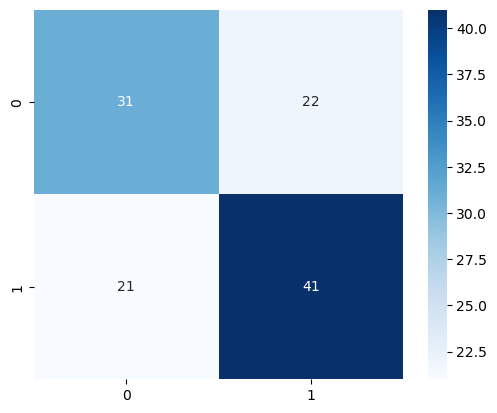

In [145]:
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)

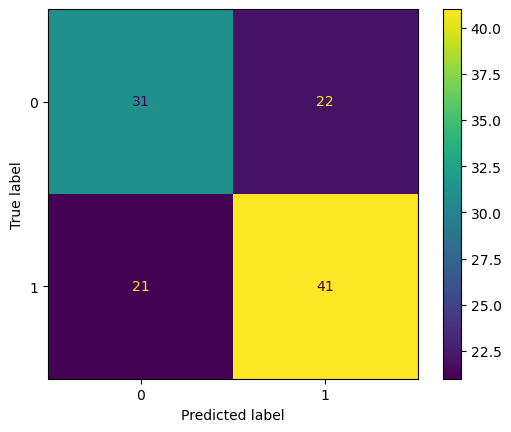

In [146]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm3,x_test,y_test)

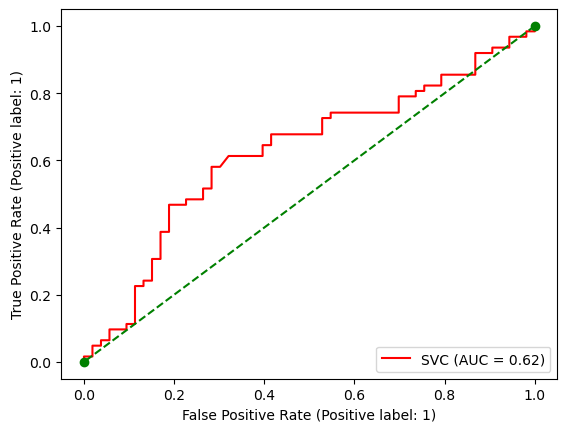

In [147]:
plot_roc_curve(svm3,x_test,y_test,color='red')
plt.plot([1,0],[1,0],'go--')

# Naive Bayes

### GaussianNB

In [148]:
from sklearn.naive_bayes import MultinomialNB , GaussianNB, BernoulliNB
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)

GaussianNB()

In [149]:
print ("Traning Accuracy: ", gnb.score(X_train_res, y_train_res)*100) # Check training accuracy
print ("Testing Accuracy: ", gnb.score(x_test,y_test)*100) # Check testing accuracy

Traning Accuracy:  66.66666666666666
Testing Accuracy:  63.47826086956522


In [150]:
pred = gnb.predict(x_test)
accuracy_score(pred,y_test)*100

63.47826086956522

In [151]:
print(classification_report(y_test,pred)) #main

              precision    recall  f1-score   support

           0       0.59      0.70      0.64        53
           1       0.69      0.58      0.63        62

    accuracy                           0.63       115
   macro avg       0.64      0.64      0.63       115
weighted avg       0.64      0.63      0.63       115



In [152]:
cm=confusion_matrix(y_test,pred)
cm

array([[37, 16],
       [26, 36]])

<AxesSubplot:>

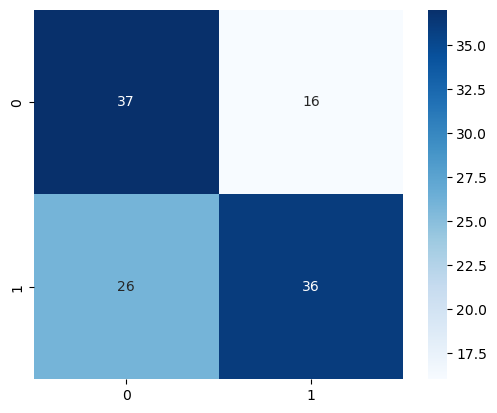

In [153]:
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)

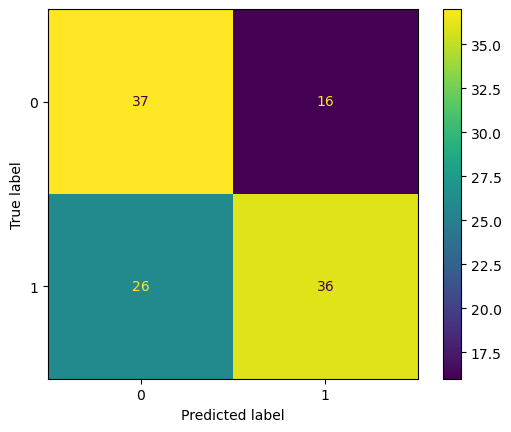

In [154]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb,x_test,y_test)

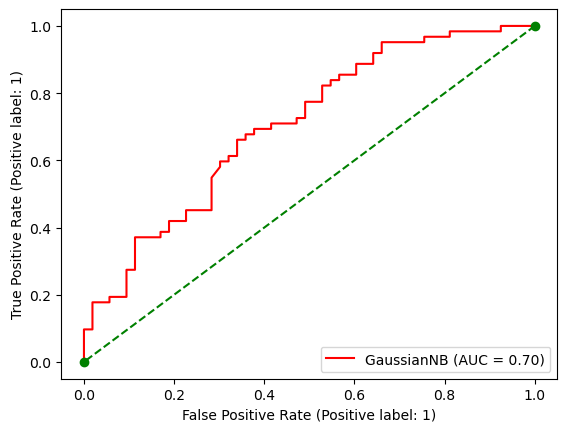

In [155]:
plot_roc_curve(gnb,x_test,y_test,color='red')
plt.plot([1,0],[1,0],'go--')

### MultinomialNB

In [156]:
mnb = MultinomialNB()
mnb.fit(X_train_res, y_train_res)

MultinomialNB()

In [157]:
print ("Traning Accuracy: ",mnb.score(X_train_res, y_train_res)*100) # Check training accuracy
print ("Testing Accuracy: ", mnb.score(x_test, y_test)*100) # Check testing accuracy

Traning Accuracy:  62.82051282051282
Testing Accuracy:  60.86956521739131


In [158]:
pred = mnb.predict(x_test)
accuracy_score(pred,y_test)*100

60.86956521739131

In [159]:
print(classification_report(y_test,pred)) #main

              precision    recall  f1-score   support

           0       0.57      0.64      0.60        53
           1       0.65      0.58      0.62        62

    accuracy                           0.61       115
   macro avg       0.61      0.61      0.61       115
weighted avg       0.61      0.61      0.61       115



In [160]:
cm=confusion_matrix(y_test,pred)
cm

array([[34, 19],
       [26, 36]])

<AxesSubplot:>

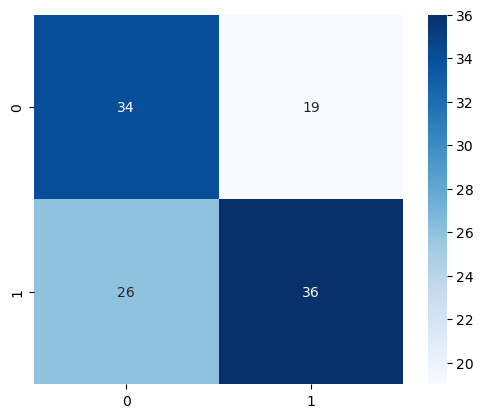

In [161]:
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)

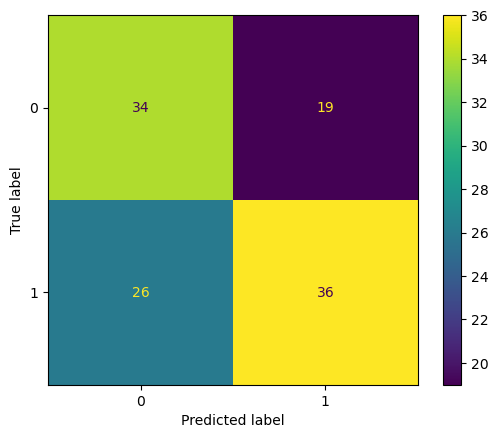

In [162]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mnb,x_test,y_test)

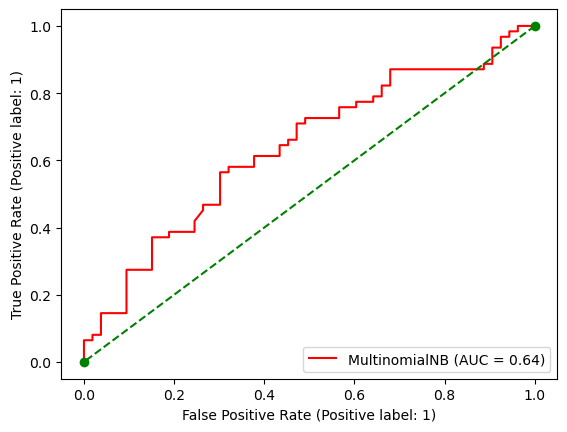

In [163]:
plot_roc_curve(mnb,x_test,y_test,color='red')
plt.plot([1,0],[1,0],'go--')

# BernoulliNB

In [164]:
bnb = BernoulliNB()
bnb.fit(X_train_res, y_train_res)

BernoulliNB()

In [165]:
print ("Traning Accuracy: ",bnb.score(X_train_res, y_train_res)*100) # Check training accuracy
print ("Testing Accuracy: ", bnb.score(x_test, y_test)*100) # Check testing accuracy

Traning Accuracy:  55.12820512820513
Testing Accuracy:  48.69565217391305


In [166]:
pred=  bnb.predict(x_test)
accuracy_score(pred,y_test)*100

48.69565217391305

In [167]:
print(classification_report(y_test,pred)) #main

              precision    recall  f1-score   support

           0       0.43      0.38      0.40        53
           1       0.52      0.58      0.55        62

    accuracy                           0.49       115
   macro avg       0.48      0.48      0.48       115
weighted avg       0.48      0.49      0.48       115



<AxesSubplot:>

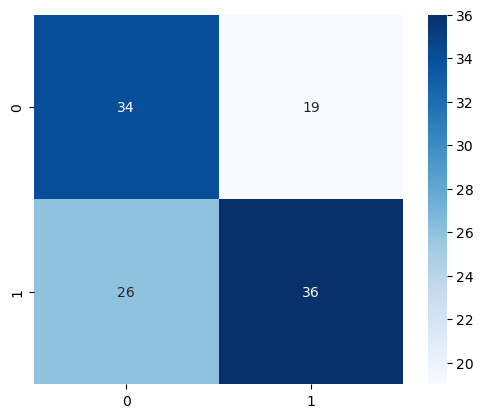

In [168]:
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)

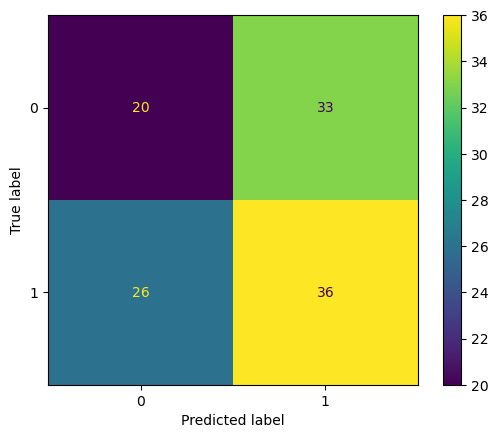

In [169]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(bnb,x_test,y_test)

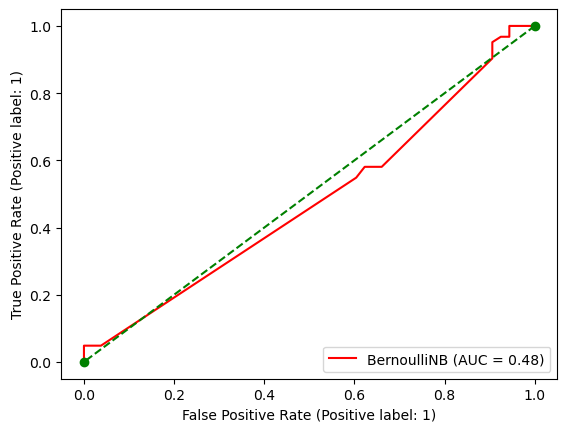

In [170]:
plot_roc_curve(bnb,x_test,y_test,color='red')
plt.plot([1,0],[1,0],'go--')

# Random Forest 

In [171]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100,max_depth=3, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=42)

In [172]:
rnd_clf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=787846414),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=996406378),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=423734972),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=415968276),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=670094950),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1914837113),
 DecisionTreeClassifier(max_depth=3, max_feat

In [173]:
len(rnd_clf.estimators_)

100

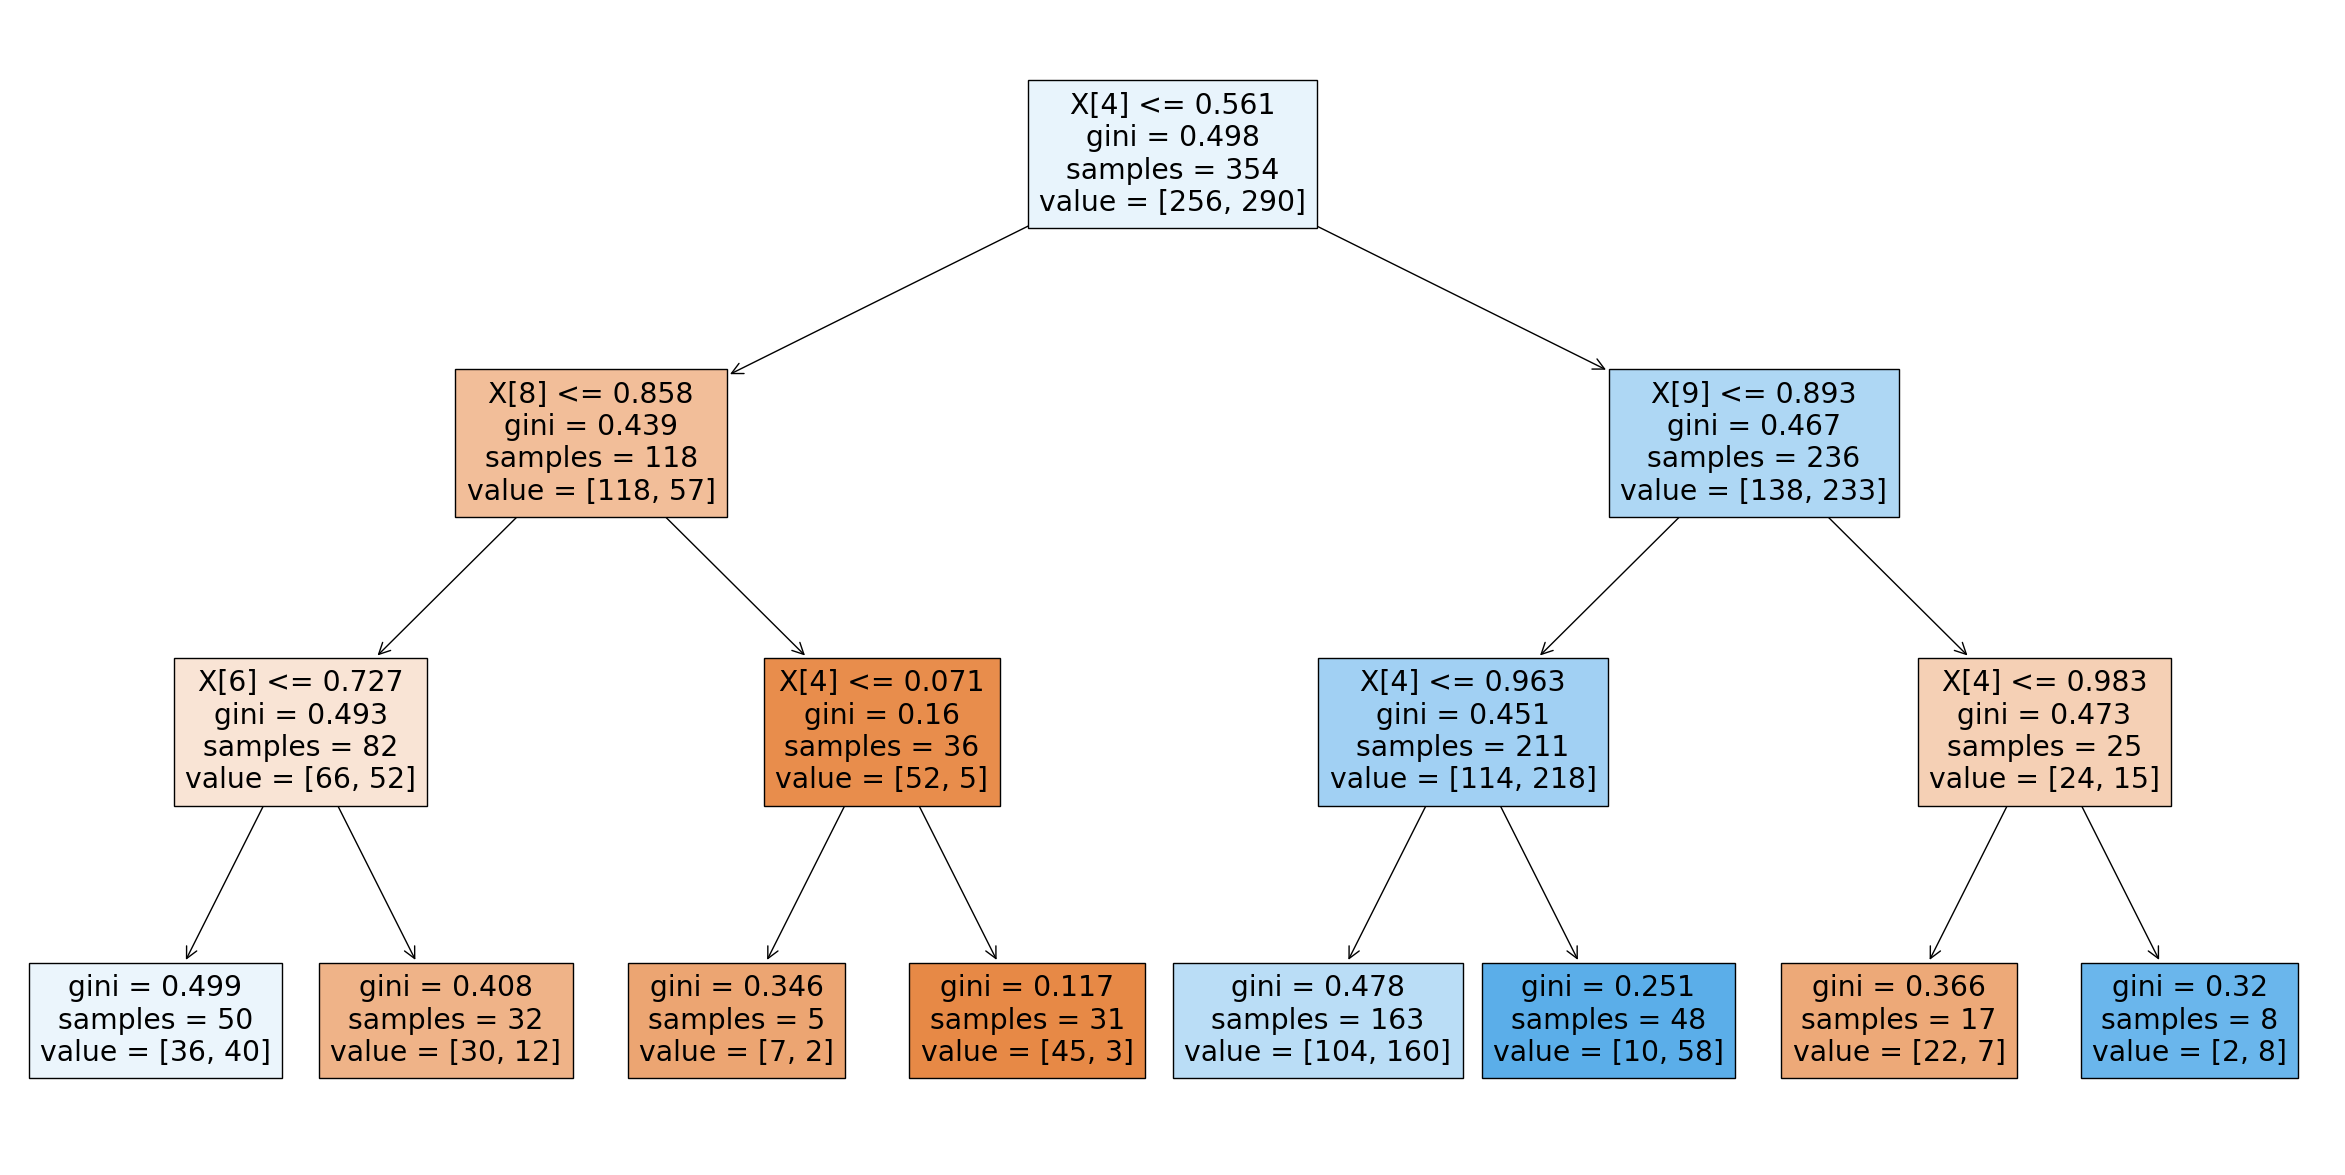

In [174]:
from sklearn import tree
plt.figure(figsize=(30,15))
for i in range(len(rnd_clf.estimators_)):
    tree.plot_tree(rnd_clf.estimators_[i],filled=True)

In [175]:
for i in range(len(rnd_clf.estimators_)):
    print(tree.export_text(rnd_clf.estimators_[i]))

|--- feature_4 <= 0.55
|   |--- feature_8 <= 0.49
|   |   |--- feature_5 <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- feature_5 >  0.50
|   |   |   |--- class: 1.0
|   |--- feature_8 >  0.49
|   |   |--- feature_9 <= 0.85
|   |   |   |--- class: 0.0
|   |   |--- feature_9 >  0.85
|   |   |   |--- class: 1.0
|--- feature_4 >  0.55
|   |--- feature_5 <= 0.85
|   |   |--- feature_7 <= 0.71
|   |   |   |--- class: 0.0
|   |   |--- feature_7 >  0.71
|   |   |   |--- class: 1.0
|   |--- feature_5 >  0.85
|   |   |--- feature_6 <= 0.07
|   |   |   |--- class: 0.0
|   |   |--- feature_6 >  0.07
|   |   |   |--- class: 1.0

|--- feature_5 <= 0.99
|   |--- feature_8 <= 0.58
|   |   |--- feature_4 <= 0.80
|   |   |   |--- class: 1.0
|   |   |--- feature_4 >  0.80
|   |   |   |--- class: 1.0
|   |--- feature_8 >  0.58
|   |   |--- feature_2 <= 0.40
|   |   |   |--- class: 0.0
|   |   |--- feature_2 >  0.40
|   |   |   |--- class: 0.0
|--- feature_5 >  0.99
|   |--- feature_4 <= 0.50
|   |   |-

In [176]:
print ("Traning Accuracy: ",rnd_clf.score(X_train_res, y_train_res)*100) # Check training accuracy
print ("Testing Accuracy: ", rnd_clf.score(x_test, y_test)*100) # Check testing accuracy

Traning Accuracy:  74.17582417582418
Testing Accuracy:  62.60869565217392


In [177]:
pred=  rnd_clf.predict(x_test)
accuracy_score(pred,y_test)*100

62.60869565217392

In [178]:
print(classification_report(y_test,pred)) #main

              precision    recall  f1-score   support

           0       0.58      0.66      0.62        53
           1       0.67      0.60      0.63        62

    accuracy                           0.63       115
   macro avg       0.63      0.63      0.63       115
weighted avg       0.63      0.63      0.63       115



In [179]:
cm=confusion_matrix(y_test,pred)
cm

array([[35, 18],
       [25, 37]])

<AxesSubplot:>

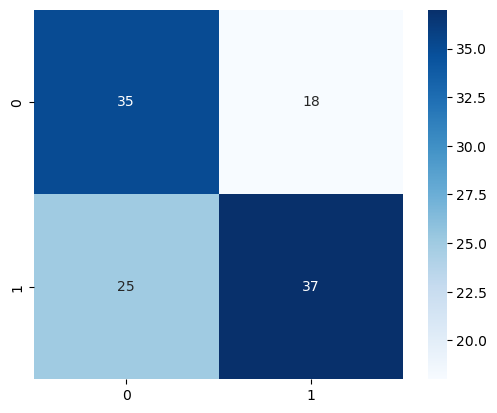

In [180]:
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)

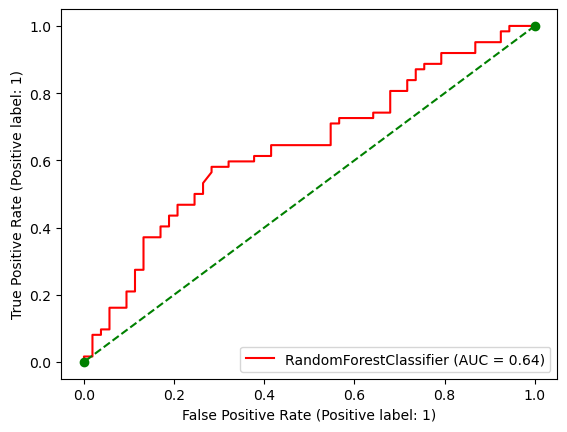

In [181]:
plot_roc_curve(rnd_clf,x_test,y_test,color='red')
plt.plot([1,0],[1,0],'go--')

# AdaBoostClassifier

In [182]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
# abc=AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy', random_state = 200),
#                                     n_estimators=2000,
#                                     learning_rate=0.1,
#                                     algorithm='SAMME.R',
#                                     random_state=1,)
abc.fit(X_train_res, y_train_res)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [183]:
print ("Traning Accuracy: ",abc.score(X_train_res, y_train_res)*100) # Check training accuracy
print ("Testing Accuracy: ", abc.score(x_test, y_test)*100) # Check testing accuracy

Traning Accuracy:  73.992673992674
Testing Accuracy:  59.130434782608695


In [184]:
pred=  abc.predict(x_test)
accuracy_score(pred,y_test)*100

59.130434782608695

In [185]:
print(classification_report(y_test,pred)) #main

              precision    recall  f1-score   support

           0       0.56      0.53      0.54        53
           1       0.62      0.65      0.63        62

    accuracy                           0.59       115
   macro avg       0.59      0.59      0.59       115
weighted avg       0.59      0.59      0.59       115



In [186]:
cm=confusion_matrix(y_test,pred)
cm

array([[28, 25],
       [22, 40]])

<AxesSubplot:>

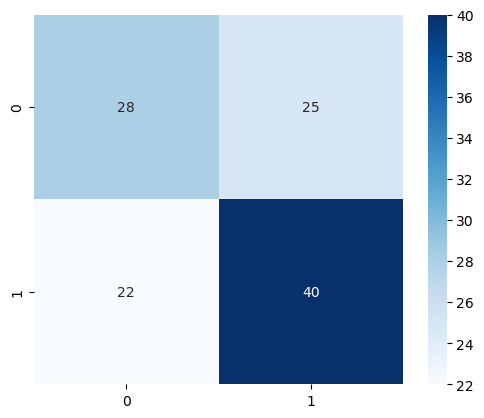

In [187]:
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)

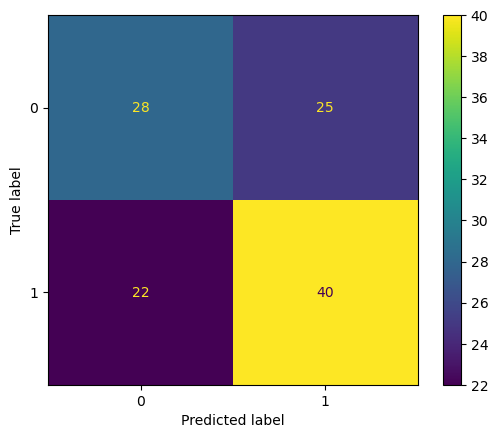

In [188]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(abc,x_test,y_test)

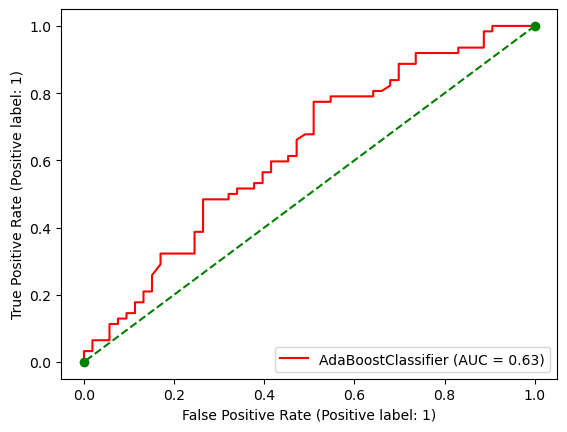

In [189]:
plot_roc_curve(abc,x_test,y_test,color='red')
plt.plot([1,0],[1,0],'go--')

# XGBoost Classifier

In [190]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [191]:
print ("Traning Accuracy: ", xgb_classifier.score(X_train_res, y_train_res)*100) # Check training accuracy
print ("Testing Accuracy: ", xgb_classifier.score(x_test,y_test)*100) # Check testing accuracy

Traning Accuracy:  99.26739926739927
Testing Accuracy:  59.130434782608695


In [192]:
pred = xgb_classifier.predict(x_test)
accuracy_score(pred,y_test)*100

59.130434782608695

In [193]:
print(classification_report(y_test,pred)) #main

              precision    recall  f1-score   support

           0       0.57      0.49      0.53        53
           1       0.61      0.68      0.64        62

    accuracy                           0.59       115
   macro avg       0.59      0.58      0.58       115
weighted avg       0.59      0.59      0.59       115



In [194]:
cm=confusion_matrix(y_test,pred)
cm

array([[26, 27],
       [20, 42]])

<AxesSubplot:>

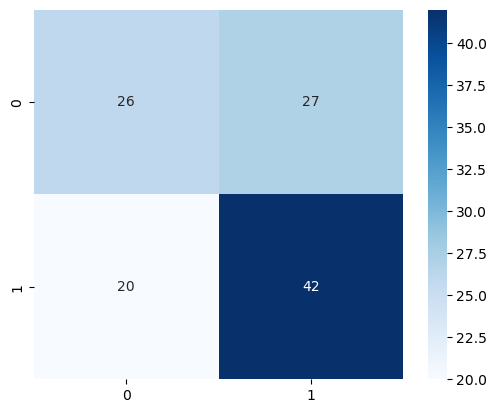

In [195]:
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)

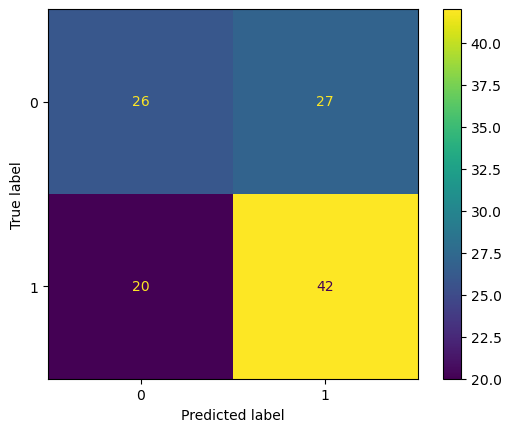

In [196]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_classifier,x_test,y_test)

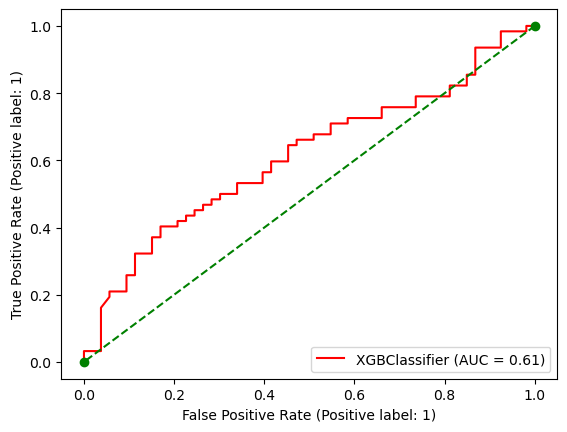

In [197]:
plot_roc_curve(xgb_classifier,x_test,y_test,color='red')
plt.plot([1,0],[1,0],'go--')

In [198]:
import tensorflow as tf

In [199]:
ann = tf.keras.models.Sequential()

In [200]:
#Prepare the ANN for fitting the model
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [201]:
#Fit with ANN
ann.fit(X_train_res, y_train_res,batch_size=1,epochs = 100)

Epoch 1/100
546/546 [==============================] - 2s 1ms/step - loss: 0.7024 - accuracy: 0.4853
Epoch 2/100
546/546 [==============================] - 1s 1ms/step - loss: 0.6957 - accuracy: 0.4634
Epoch 3/100
546/546 [==============================] - 1s 1ms/step - loss: 0.6938 - accuracy: 0.4908
Epoch 4/100
546/546 [==============================] - 1s 1ms/step - loss: 0.6905 - accuracy: 0.5037
Epoch 5/100
546/546 [==============================] - 1s 1ms/step - loss: 0.6883 - accuracy: 0.5311
Epoch 6/100
546/546 [==============================] - 1s 1ms/step - loss: 0.6865 - accuracy: 0.5403
Epoch 7/100
546/546 [==============================] - 1s 1ms/step - loss: 0.6829 - accuracy: 0.5568
Epoch 8/100
546/546 [==============================] - 1s 1ms/step - loss: 0.6799 - accuracy: 0.5604
Epoch 9/100
546/546 [==============================] - 1s 1ms/step - loss: 0.6767 - accuracy: 0.5678
Epoch 10/100
546/546 [==============================] - 1s 1ms/step - loss: 0.6725 - accura

In [202]:
#ANN Accuracy Score
ann_pred = ann.predict(x_test)
ann_score = accuracy_score(y_test,pred)
ann_score

4/4 [==============================] - 0s 2ms/step


0.591304347826087

### Gradient Boosting

In [203]:
import xgboost as xgb
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(X_train_res, y_train_res)
   
predicted = model.predict(x_test)
   
cm = confusion_matrix(y_test, predicted)
print()
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%")


The accuracy of X Gradient Boosting is :  59.130434782608695 %
